<a href="https://colab.research.google.com/github/Gera9999/Colab_Estetica/blob/main/VentasEstetica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd

print('hello')

hello


In [11]:


data = pd.read_csv('/content/sample_data/Ventasoriginal.csv', sep=';') # Specify the semicolon delimiter
display(data.head())

,fecha,Monto,Servicio,Tipo Pago,Comision,Unnamed: 5,Unnamed: 6
0,03-01-2024,$27.683,Depilacion,Transferencia Banco Estado,0,NaN,NaN
1,03-01-2024,$94.515,Depilacion,Transferencia Banco Estado,0,NaN,NaN
2,03-01-2024,$27.683,Depilacion,Transferencia Banco Estado,0,NaN,NaN
3,03-01-2024,$69.628,Depilacion,Transferencia Banco Estado,0,NaN,NaN
4,03-01-2024,$139.256,Depilacion,Credito,0,NaN,NaN


In [20]:
# Eliminar las columnas con índice 5 y 6 (columnas 6 y 7 si cuentas desde 1)
# Asegúrate de que estos son los índices correctos de tus columnas vacías
data = data.drop(data.columns[[5, 6]], axis=1)

# Mostrar las primeras filas para verificar que las columnas han sido eliminadas
display(data.head())



,fecha,Monto,Servicio,Tipo Pago,Comision
0,03-01-2024,$27.683,Depilacion,Transferencia Banco Estado,0
1,03-01-2024,$94.515,Depilacion,Transferencia Banco Estado,0
2,03-01-2024,$27.683,Depilacion,Transferencia Banco Estado,0
3,03-01-2024,$69.628,Depilacion,Transferencia Banco Estado,0
4,03-01-2024,$139.256,Depilacion,Credito,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fecha        3095 non-null   object
 1    Monto       3095 non-null   object
 2   Servicio     3095 non-null   object
 3    Tipo Pago   3095 non-null   object
 4   Comision     3095 non-null   object
dtypes: object(5)
memory usage: 121.0+ KB


In [21]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fecha        3095 non-null   object
 1    Monto       3095 non-null   object
 2   Servicio     3095 non-null   object
 3    Tipo Pago   3095 non-null   object
 4   Comision     3095 non-null   object
dtypes: object(5)
memory usage: 121.0+ KB


In [22]:
data.describe ()


,fecha,Monto,Servicio,Tipo Pago,Comision
count,3095,3095,3095,3095,3095
unique,514,200,13,12,5
top,17-02-2023,$335.276,Botox 3,Transferencia,0
freq,23,474,760,696,1031


In [25]:
# Asegurarse de que la columna 'Monto' esté limpia y sea numérica en todo el DataFrame
# Si ya hiciste esto en un paso anterior, puedes omitir esta parte
if 'Monto_Numerico' not in data.columns:
    data['Monto_Numerico'] = data['Monto'].astype(str).str.replace('$', '').str.replace('.', '').str.replace(',', '').astype(float)

# Calcular el monto total de ventas por cada servicio
total_ventas_por_servicio = data.groupby('Servicio')['Monto_Numerico'].sum()

# Calcular el monto total de ventas general
total_ventas_general = data['Monto_Numerico'].sum()

# Calcular el porcentaje de ventas para cada servicio
porcentaje_ventas_por_servicio = (total_ventas_por_servicio / total_ventas_general) * 100

print("Porcentaje de Ventas por Servicio:")
display(porcentaje_ventas_por_servicio)

# Puedes iterar sobre los resultados para imprimir frases como las que mencionaste
print("\Resumen del Porcentaje de Ventas por Servicio:")
for servicio, porcentaje in porcentaje_ventas_por_servicio.items():
    print(f"El {porcentaje:.2f}% de las ventas corresponde al servicio '{servicio}'.")

# Si quieres mostrar solo un servicio específico (por ejemplo, Botox 3)
servicio_interes = 'Botox 3'
if servicio_interes in porcentaje_ventas_por_servicio:
    print(f"\nEl {porcentaje_ventas_por_servicio[servicio_interes]:.2f}% de las ventas corresponde al servicio '{servicio_interes}'.")
else:
    print(f"\nNo se encontró información de ventas para el servicio '{servicio_interes}'.")

Porcentaje de Ventas por Servicio:


,Monto_Numerico
Servicio,
Bioestimulantes,2.903256
Botox 1,3.059582
Botox 2,16.365077
Botox 3,37.437677
Depilacion,7.083442
Labios,0.546444
Limpieza Facial,2.188641
Limpieza Facial Premium,0.087681
Lipopapada,0.028509


\Resumen del Porcentaje de Ventas por Servicio:
El 2.90% de las ventas corresponde al servicio 'Bioestimulantes'.
El 3.06% de las ventas corresponde al servicio 'Botox 1'.
El 16.37% de las ventas corresponde al servicio 'Botox 2'.
El 37.44% de las ventas corresponde al servicio 'Botox 3'.
El 7.08% de las ventas corresponde al servicio 'Depilacion'.
El 0.55% de las ventas corresponde al servicio 'Labios'.
El 2.19% de las ventas corresponde al servicio 'Limpieza Facial'.
El 0.09% de las ventas corresponde al servicio 'Limpieza Facial Premium'.
El 0.03% de las ventas corresponde al servicio 'Lipopapada'.
El 0.14% de las ventas corresponde al servicio 'Menton'.
El 0.61% de las ventas corresponde al servicio 'Pink Glow'.
El 0.11% de las ventas corresponde al servicio 'Pomulos'.
El 29.44% de las ventas corresponde al servicio 'Rinomodelacion'.

El 37.44% de las ventas corresponde al servicio 'Botox 3'.


In [26]:
# Asegurarse de que la columna 'Fecha' sea de tipo datetime
# Es posible que la columna 'fecha' esté como string, necesitamos convertirla.
# Reemplazamos el nombre de la columna 'fecha' por 'Fecha' si es necesario por consistencia
if 'fecha' in data.columns:
    data['Fecha'] = pd.to_datetime(data['fecha'], format='%d-%m-%Y')
    # Opcional: eliminar la columna original si ya no la necesitas
    # data = data.drop('fecha', axis=1)
elif 'Fecha' not in data.columns:
     # Si la columna ya se llama 'Fecha' y no es datetime, convertirla
     data['Fecha'] = pd.to_datetime(data['Fecha'], format='%d-%m-%Y')


# Extraer el año de la columna de fecha
data['Año'] = data['Fecha'].dt.year

# Asegurarse de que la columna 'Monto_Numerico' esté limpia y sea numérica
# Si ya hiciste esto en un paso anterior, puedes omitir esta parte
if 'Monto_Numerico' not in data.columns:
    data['Monto_Numerico'] = data['Monto'].astype(str).str.replace('$', '').str.replace('.', '').str.replace(',', '').astype(float)


# Calcular el total de ventas por Servicio y por Año
ventas_por_servicio_año = data.groupby(['Año', 'Servicio'])['Monto_Numerico'].sum().reset_index()

# Para cada año, ordenar los servicios por ventas descendentes y calcular el porcentaje acumulado
print("Análisis de Concentración de Ventas por Año:")
for año in ventas_por_servicio_año['Año'].unique():
    print(f"\nAño: {año}")

    # Filtrar datos por año
    ventas_año = ventas_por_servicio_año[ventas_por_servicio_año['Año'] == año].copy()

    # Ordenar por ventas descendentes
    ventas_año = ventas_año.sort_values(by='Monto_Numerico', ascending=False)

    # Calcular el porcentaje de las ventas de cada servicio sobre el total anual
    total_anual = ventas_año['Monto_Numerico'].sum()
    ventas_año['Porcentaje_Anual'] = (ventas_año['Monto_Numerico'] / total_anual) * 100

    # Calcular el porcentaje acumulado
    ventas_año['Porcentaje_Acumulado'] = ventas_año['Porcentaje_Anual'].cumsum()

    # Identificar servicios que concentran el 50% y 75%
    servicios_50_porciento = ventas_año[ventas_año['Porcentaje_Acumulado'] <= 50]['Servicio'].tolist()
    # Incluir el servicio que cruza el umbral del 50% si no está ya incluido
    if ventas_año[ventas_año['Porcentaje_Acumulado'] > 50].shape[0] > 0:
         primer_servicio_despues_50 = ventas_año[ventas_año['Porcentaje_Acumulado'] > 50].iloc[0]['Servicio']
         if primer_servicio_despues_50 not in servicios_50_porciento:
              servicios_50_porciento.append(primer_servicio_despues_50)


    servicios_75_porciento = ventas_año[ventas_año['Porcentaje_Acumulado'] <= 75]['Servicio'].tolist()
     # Incluir el servicio que cruza el umbral del 75% si no está ya incluido
    if ventas_año[ventas_año['Porcentaje_Acumulado'] > 75].shape[0] > 0:
         primer_servicio_despues_75 = ventas_año[ventas_año['Porcentaje_Acumulado'] > 75].iloc[0]['Servicio']
         if primer_servicio_despues_75 not in servicios_75_porciento:
              servicios_75_porciento.append(primer_servicio_despues_75)


    print("Servicios que concentran aproximadamente el 50% de las ventas anuales:")
    print(servicios_50_porciento)

    print("Servicios que concentran aproximadamente el 75% de las ventas anuales:")
    print(servicios_75_porciento)

    # Opcional: mostrar la tabla completa para el año
    # display(ventas_año)

Análisis de Concentración de Ventas por Año:

Año: 2023
Servicios que concentran aproximadamente el 50% de las ventas anuales:
['Rinomodelacion', 'Botox 3']
Servicios que concentran aproximadamente el 75% de las ventas anuales:
['Rinomodelacion', 'Botox 3']

Año: 2024
Servicios que concentran aproximadamente el 50% de las ventas anuales:
['Botox 3', 'Rinomodelacion']
Servicios que concentran aproximadamente el 75% de las ventas anuales:
['Botox 3', 'Rinomodelacion', 'Botox 2']

Año: 2025
Servicios que concentran aproximadamente el 50% de las ventas anuales:
['Botox 3', 'Botox 2']
Servicios que concentran aproximadamente el 75% de las ventas anuales:
['Botox 3', 'Botox 2', 'Rinomodelacion', 'Bioestimulantes']


In [27]:
# Asegurarse de que la columna 'Fecha' sea de tipo datetime
# Es posible que la columna 'fecha' esté como string, necesitamos convertirla.
# Reemplazamos el nombre de la columna 'fecha' por 'Fecha' si es necesario por consistencia
if 'fecha' in data.columns:
    data['Fecha'] = pd.to_datetime(data['fecha'], format='%d-%m-%Y')
    # Opcional: eliminar la columna original si ya no la necesitas
    # data = data.drop('fecha', axis=1)
elif 'Fecha' not in data.columns:
     # Si la columna ya se llama 'Fecha' y no es datetime, convertirla
     data['Fecha'] = pd.to_datetime(data['Fecha'], format='%d-%m-%Y')


# Extraer el año de la columna de fecha
data['Año'] = data['Fecha'].dt.year

# Asegurarse de que la columna 'Monto_Numerico' esté limpia y sea numérica
# Si ya hiciste esto en un paso anterior, puedes omitir esta parte
if 'Monto_Numerico' not in data.columns:
    data['Monto_Numerico'] = data['Monto'].astype(str).str.replace('$', '').str.replace('.', '').str.replace(',', '').astype(float)


# Calcular el total de ventas por Servicio y por Año
ventas_por_servicio_año = data.groupby(['Año', 'Servicio'])['Monto_Numerico'].sum().reset_index()

# Para cada año, ordenar los servicios por ventas descendentes y calcular el porcentaje acumulado
print("Análisis de Concentración de Ventas por Año:")
for año in ventas_por_servicio_año['Año'].unique():
    print(f"\n--- Año: {año} ---")

    # Filtrar datos por año
    ventas_año = ventas_por_servicio_año[ventas_por_servicio_año['Año'] == año].copy()

    # Ordenar por ventas descendentes
    ventas_año = ventas_año.sort_values(by='Monto_Numerico', ascending=False)

    # Calcular el porcentaje de las ventas de cada servicio sobre el total anual
    total_anual = ventas_año['Monto_Numerico'].sum()
    ventas_año['Porcentaje_Anual'] = (ventas_año['Monto_Numerico'] / total_anual) * 100

    # Calcular el porcentaje acumulado
    ventas_año['Porcentaje_Acumulado'] = ventas_año['Porcentaje_Anual'].cumsum()

    # Identificar servicios que concentran el 50% y 75%
    servicios_50_porciento = ventas_año[ventas_año['Porcentaje_Acumulado'] <= 50]['Servicio'].tolist()
    # Incluir el servicio que cruza el umbral del 50% si no está ya incluido
    if ventas_año[ventas_año['Porcentaje_Acumulado'] > 50].shape[0] > 0:
         primer_servicio_despues_50 = ventas_año[ventas_año['Porcentaje_Acumulado'] > 50].iloc[0]['Servicio']
         if primer_servicio_despues_50 not in servicios_50_porciento:
              servicios_50_porciento.append(primer_servicio_despues_50)


    servicios_75_porciento = ventas_año[ventas_año['Porcentaje_Acumulado'] <= 75]['Servicio'].tolist()
     # Incluir el servicio que cruza el umbral del 75% si no está ya incluido
    if ventas_año[ventas_año['Porcentaje_Acumulado'] > 75].shape[0] > 0:
         primer_servicio_despues_75 = ventas_año[ventas_año['Porcentaje_Acumulado'] > 75].iloc[0]['Servicio']
         if primer_servicio_despues_75 not in servicios_75_porciento:
              servicios_75_porciento.append(primer_servicio_despues_75)


    # --- Mostrar detalles para el 50% ---
    print("\nServicios que concentran aproximadamente el 50% de las ventas anuales:")
    # Filtrar el DataFrame ordenado por los servicios identificados para el 50%
    ventas_50_porciento_df = ventas_año[ventas_año['Servicio'].isin(servicios_50_porciento)]
    # Mostrar la tabla con los detalles para estos servicios
    display(ventas_50_porciento_df[['Servicio', 'Monto_Numerico', 'Porcentaje_Anual', 'Porcentaje_Acumulado']])


    # --- Mostrar detalles para el 75% ---
    print("\nServicios que concentran aproximadamente el 75% de las ventas anuales:")
    # Filtrar el DataFrame ordenado por los servicios identificados para el 75%
    ventas_75_porciento_df = ventas_año[ventas_año['Servicio'].isin(servicios_75_porciento)]
    # Mostrar la tabla con los detalles para estos servicios
    display(ventas_75_porciento_df[['Servicio', 'Monto_Numerico', 'Porcentaje_Anual', 'Porcentaje_Acumulado']])

    # Opcional: mostrar la tabla completa para el año
    # display(ventas_año)

Análisis de Concentración de Ventas por Año:

--- Año: 2023 ---

Servicios que concentran aproximadamente el 50% de las ventas anuales:


,Servicio,Monto_Numerico,Porcentaje_Anual,Porcentaje_Acumulado
5,Rinomodelacion,97033961.0,42.822855,42.822855
2,Botox 3,78161863.0,34.494254,77.317109



Servicios que concentran aproximadamente el 75% de las ventas anuales:


,Servicio,Monto_Numerico,Porcentaje_Anual,Porcentaje_Acumulado
5,Rinomodelacion,97033961.0,42.822855,42.822855
2,Botox 3,78161863.0,34.494254,77.317109



--- Año: 2024 ---

Servicios que concentran aproximadamente el 50% de las ventas anuales:


,Servicio,Monto_Numerico,Porcentaje_Anual,Porcentaje_Acumulado
8,Botox 3,105346344.0,38.959559,38.959559
13,Rinomodelacion,67915096.0,25.116602,64.076160



Servicios que concentran aproximadamente el 75% de las ventas anuales:


,Servicio,Monto_Numerico,Porcentaje_Anual,Porcentaje_Acumulado
8,Botox 3,105346344.0,38.959559,38.959559
13,Rinomodelacion,67915096.0,25.116602,64.076160
7,Botox 2,58642845.0,21.687505,85.763665



--- Año: 2025 ---

Servicios que concentran aproximadamente el 50% de las ventas anuales:


,Servicio,Monto_Numerico,Porcentaje_Anual,Porcentaje_Acumulado
17,Botox 3,54805736.0,39.267929,39.267929
16,Botox 2,25627214.0,18.361721,57.629649



Servicios que concentran aproximadamente el 75% de las ventas anuales:


,Servicio,Monto_Numerico,Porcentaje_Anual,Porcentaje_Acumulado
17,Botox 3,54805736.0,39.267929,39.267929
16,Botox 2,25627214.0,18.361721,57.629649
25,Rinomodelacion,22479028.0,16.106067,73.735716
14,Bioestimulantes,18481021.0,13.241523,86.977240


In [6]:
# Asegurarse de que la columna 'Monto' esté limpia y sea numérica
# Eliminar el símbolo '$', los puntos y las comas de la columna 'Monto'
data['Monto_Limpio_Str'] = data['Monto'].astype(str).str.replace('$', '', regex=False).str.replace('.', '', regex=False).str.replace(',', '', regex=False)

# Convertir la columna limpia a numérica usando pd.to_numeric con errors='coerce'
data['Monto_Numerico'] = pd.to_numeric(data['Monto_Limpio_Str'], errors='coerce')

# Opcional: eliminar la columna temporal 'Monto_Limpio_Str' si ya no la necesitas
# data = data.drop('Monto_Limpio_Str', axis=1)


# Manejar posibles NaN resultantes de la limpieza del monto
# Opción 1: Eliminar filas con Monto_Numerico NaN (si no son muchas)
data.dropna(subset=['Monto_Numerico'], inplace=True)
# Opción 2: Rellenar NaN con 0 o la media (si NaN significa 0 ventas o un valor promedio)
# data['Monto_Numerico'].fillna(0, inplace=True)
# data['Monto_Numerico'].fillna(data['Monto_Numerico'].mean(), inplace=True)

# Asegurarse de que la columna 'Servicio' sea string y manejar posibles NaNs (si los hubiera)
data['Servicio'] = data['Servicio'].astype(str).fillna('Desconocido')

/tmp/ipython-input-8-2910766503.py:20: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Fecha_dt'] = pd.to_datetime(data['fecha'], infer_datetime_format=True)


No se pudo inferir el formato de fecha, intentando con '%d-%m-%Y'
Preparación de datos completa. Primeras filas del DataFrame limpio:


,fecha,Monto,Servicio,Tipo Pago,Comision,Unnamed: 5,Unnamed: 6,Fecha_dt,Monto_Limpio_Str,Monto_Numerico,Año,Mes,Nombre_Mes,Semana
0,03-01-2024,$27.683,Depilacion,Transferencia Banco Estado,0,NaN,NaN,2024-01-03,27683,27683,2024,1,January,1
1,03-01-2024,$94.515,Depilacion,Transferencia Banco Estado,0,NaN,NaN,2024-01-03,94515,94515,2024,1,January,1
2,03-01-2024,$27.683,Depilacion,Transferencia Banco Estado,0,NaN,NaN,2024-01-03,27683,27683,2024,1,January,1
3,03-01-2024,$69.628,Depilacion,Transferencia Banco Estado,0,NaN,NaN,2024-01-03,69628,69628,2024,1,January,1
4,03-01-2024,$139.256,Depilacion,Credito,0,NaN,NaN,2024-01-03,139256,139256,2024,1,January,1



Información del DataFrame después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha             3095 non-null   object        
 1   Monto             3095 non-null   object        
 2   Servicio          3095 non-null   object        
 3   Tipo Pago         3095 non-null   object        
 4   Comision          3095 non-null   object        
 5   Unnamed: 5        0 non-null      float64       
 6   Unnamed: 6        1 non-null      float64       
 7   Fecha_dt          3095 non-null   datetime64[ns]
 8   Monto_Limpio_Str  3095 non-null   object        
 9   Monto_Numerico    3095 non-null   int64         
 10  Año               3095 non-null   int32         
 11  Mes               3095 non-null   int32         
 12  Nombre_Mes        3095 non-null   object        
 13  Semana            3095 non-

,Unnamed: 5,Unnamed: 6,Fecha_dt,Monto_Numerico,Año,Mes,Semana
count,0.0,1.0,3095,3.095000e+03,3095.000000,3095.000000,3095.0
mean,NaN,26.0,2024-03-04 21:24:08.142164736,2.056742e+05,2023.774475,5.323748,21.435218
min,NaN,26.0,2023-01-02 00:00:00,2.768000e+03,2023.000000,1.000000,1.0
25%,NaN,26.0,2023-06-22 00:00:00,6.962800e+04,2023.000000,2.000000,8.0
50%,NaN,26.0,2024-03-21 00:00:00,2.374060e+05,2024.000000,5.000000,18.0
75%,NaN,26.0,2024-10-25 00:00:00,3.352760e+05,2024.000000,8.000000,33.0
max,NaN,26.0,2025-05-31 00:00:00,1.202409e+06,2025.000000,12.000000,52.0
std,NaN,NaN,NaN,1.407925e+05,0.732164,3.443496,14.988131



--- Análisis Descriptivo de Ventas ---

Ventas Totales por Servicio:


,Monto_Numerico
Servicio,
Botox 3,238313943
Rinomodelacion,187428085
Botox 2,104173823
Depilacion,45090482
Botox 1,19476127
Bioestimulantes,18481021
Limpieza Facial,13932054
Pink Glow,3911324
Labios,3478456


/tmp/ipython-input-8-2910766503.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_servicios.index, y=top_servicios.values, palette='viridis')


<Figure size 1000x600 with 0 Axes>

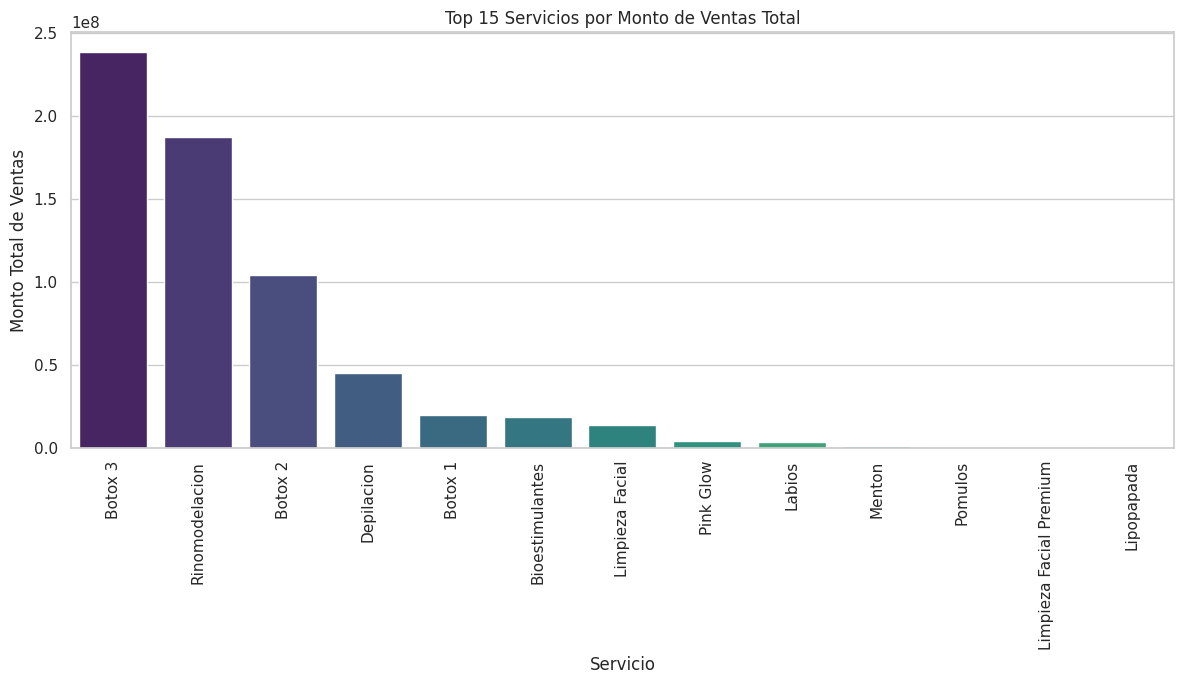


Ventas Totales por Año:


,Monto_Numerico
Año,
2023,226593862
2024,270399223
2025,139568696


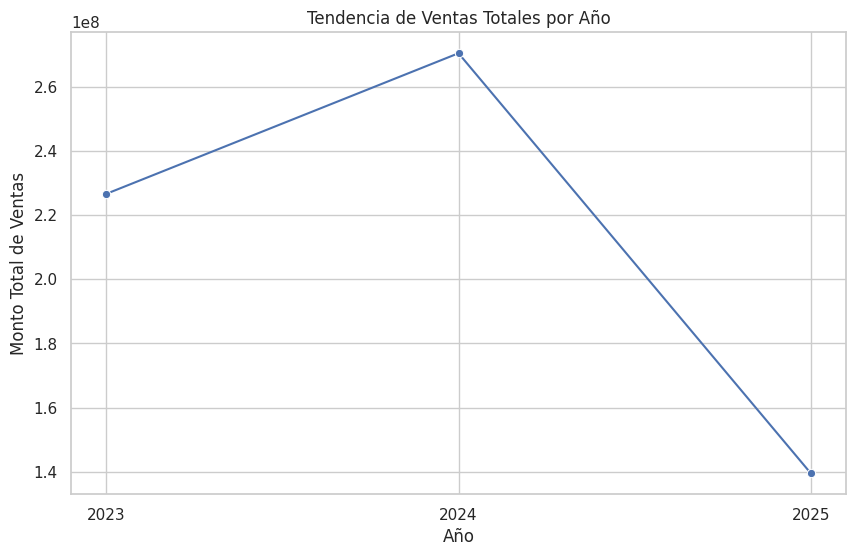


Ventas Totales por Mes (Promedio a lo largo de los años o por cada año):


,Monto_Numerico
Nombre_Mes,
January,67141720
February,63725407
March,68339446
April,68644039
May,65347477
June,44644849
July,49940746
August,47604975
September,40712650


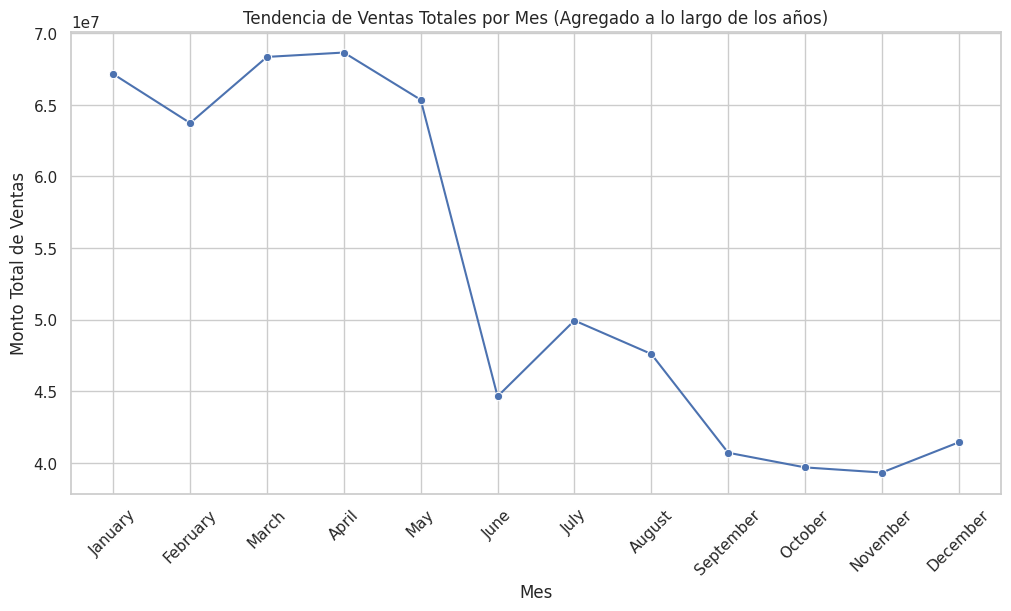

Año,2023,2024,2025
Mes,,,
1,17584958.0,26869643.0,22687119.0
2,19807405.0,20118158.0,23799844.0
3,20022028.0,20451479.0,27865939.0
4,12139152.0,23649500.0,32855387.0
5,11426762.0,21560308.0,32360407.0
6,22848544.0,21796305.0,0.0
7,25002790.0,24937956.0,0.0
8,23776085.0,23828890.0,0.0
9,18102929.0,22609721.0,0.0


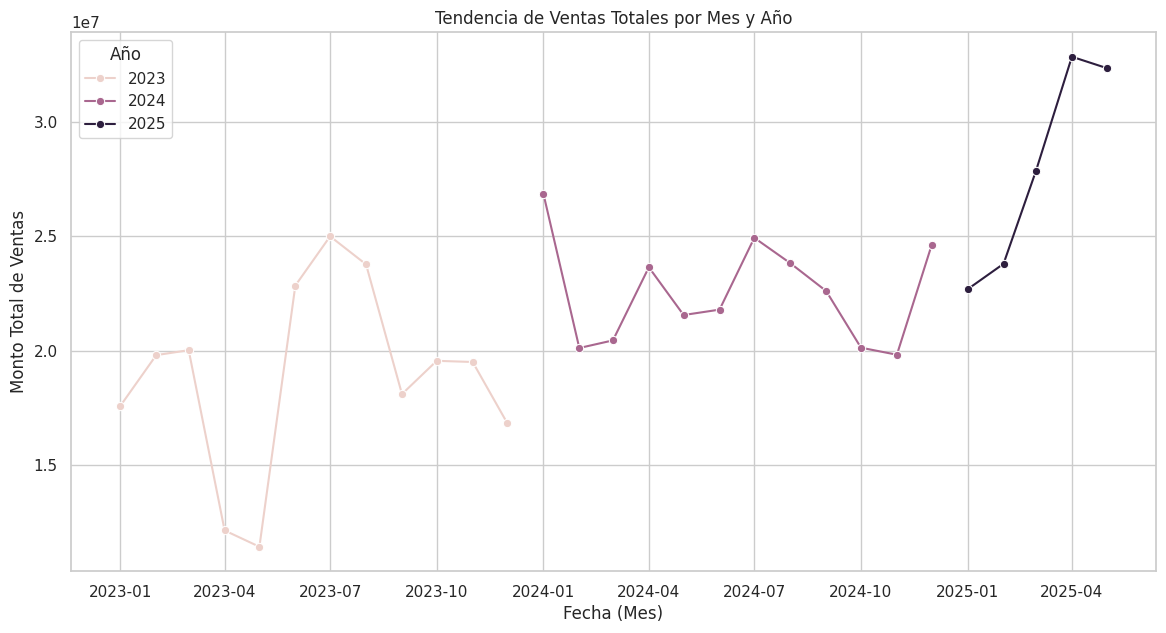


--- Análisis de Concentración de Ventas (Visualización) ---

Análisis de Concentración para el Año: 2023


/tmp/ipython-input-8-2910766503.py:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Servicio', y='Monto_Numerico', data=ventas_año, palette='viridis')


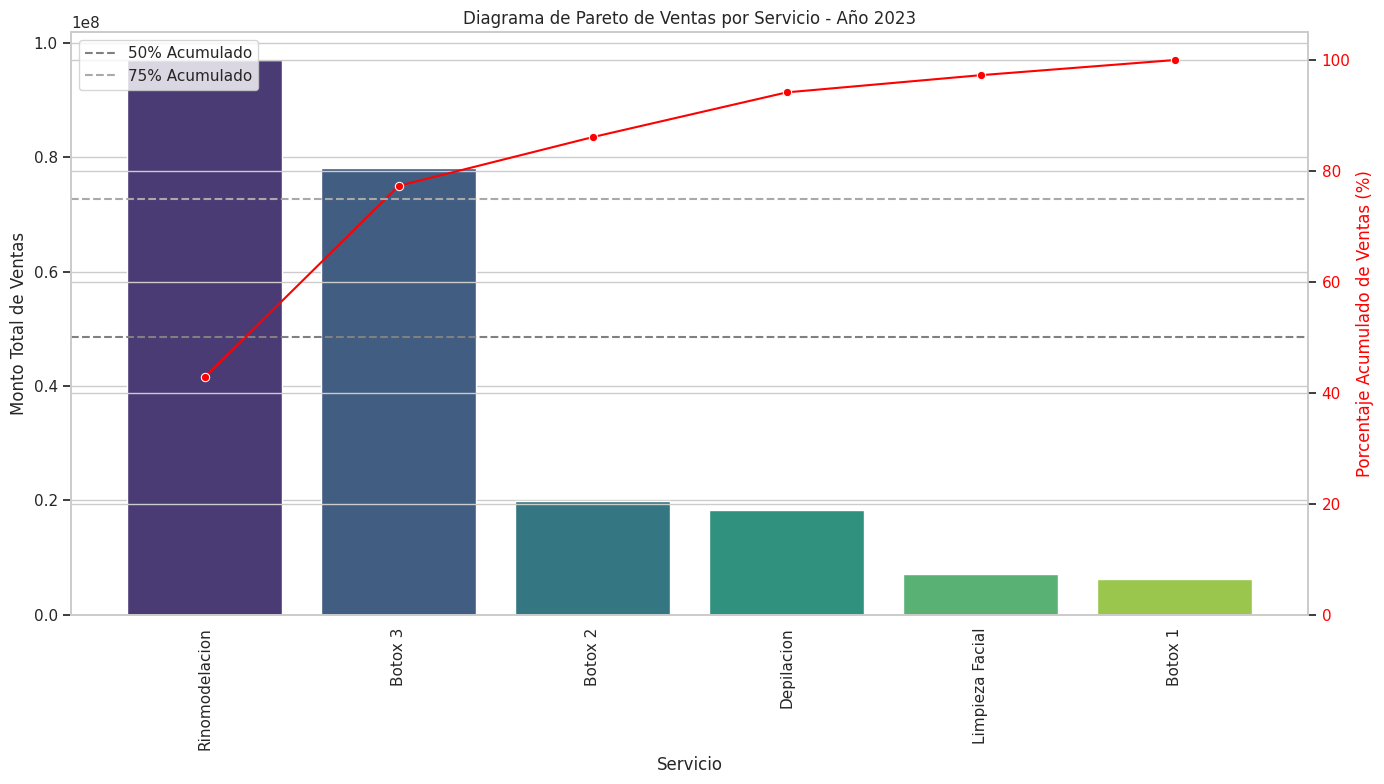

Tabla de Concentración de Ventas para el Año:


,Servicio,Monto_Numerico,Porcentaje_Anual,Porcentaje_Acumulado
0,Rinomodelacion,97033961,42.822855,42.822855
1,Botox 3,78161863,34.494254,77.317109
2,Botox 2,19903764,8.783894,86.101003
3,Depilacion,18280825,8.067661,94.168664
4,Limpieza Facial,7029164,3.102098,97.270762
5,Botox 1,6184285,2.729238,100.000000



Análisis de Concentración para el Año: 2024


/tmp/ipython-input-8-2910766503.py:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Servicio', y='Monto_Numerico', data=ventas_año, palette='viridis')


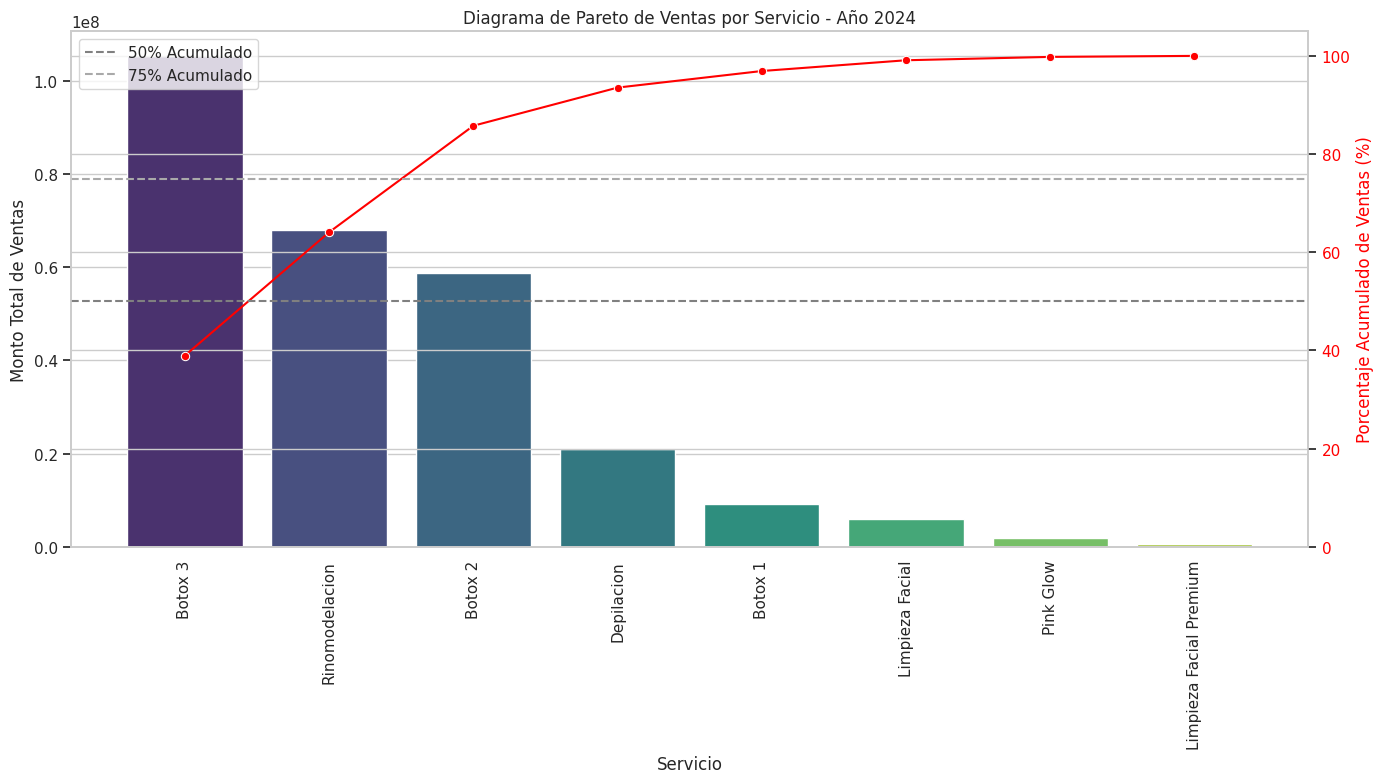

Tabla de Concentración de Ventas para el Año:


,Servicio,Monto_Numerico,Porcentaje_Anual,Porcentaje_Acumulado
0,Botox 3,105346344,38.959559,38.959559
1,Rinomodelacion,67915096,25.116602,64.076160
2,Botox 2,58642845,21.687505,85.763665
3,Depilacion,21019988,7.773687,93.537352
4,Botox 1,9132632,3.377462,96.914814
5,Limpieza Facial,5927853,2.192260,99.107074
6,Pink Glow,1856324,0.686512,99.793586
7,Limpieza Facial Premium,558141,0.206414,100.000000



Análisis de Concentración para el Año: 2025


/tmp/ipython-input-8-2910766503.py:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Servicio', y='Monto_Numerico', data=ventas_año, palette='viridis')


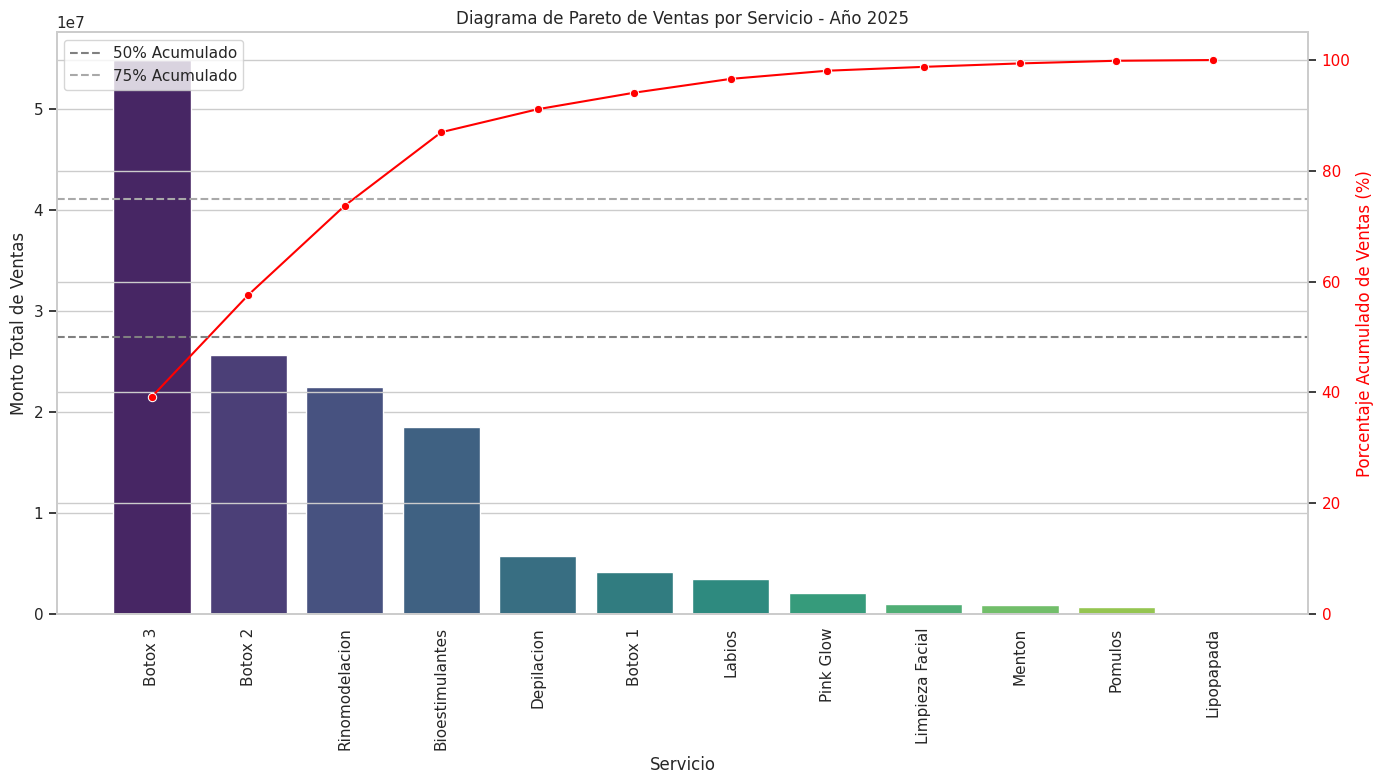

Tabla de Concentración de Ventas para el Año:


,Servicio,Monto_Numerico,Porcentaje_Anual,Porcentaje_Acumulado
0,Botox 3,54805736,39.267929,39.267929
1,Botox 2,25627214,18.361721,57.629649
2,Rinomodelacion,22479028,16.106067,73.735716
3,Bioestimulantes,18481021,13.241523,86.977240
4,Depilacion,5789669,4.148258,91.125497
5,Botox 1,4159210,2.980045,94.105542
6,Labios,3478456,2.492290,96.597832
7,Pink Glow,2055000,1.472393,98.070225
8,Limpieza Facial,975037,0.698607,98.768832
9,Menton,866293,0.620693,99.389525


In [8]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualización (opcional)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6)) # Tamaño por defecto de los gráficos

# --- 1. Limpieza y Preparación de Datos ---

# Asegurarse de que los nombres de las columnas no tengan espacios extra
data.columns = data.columns.str.strip()

# Asegurarse de que la columna de fecha sea de tipo datetime
# Usar el nombre de columna correcto: 'fecha' (con 'f' minúscula)
try:
    # Intentar inferir el formato primero para mayor robustez
    data['Fecha_dt'] = pd.to_datetime(data['fecha'], infer_datetime_format=True)
except Exception:
    print("No se pudo inferir el formato de fecha, intentando con '%d-%m-%Y'")
    # Intentar con el formato conocido, usando errors='coerce' para manejar inválidos
    data['Fecha_dt'] = pd.to_datetime(data['fecha'], format='%d-%m-%Y', errors='coerce')

# Eliminar filas donde la fecha no pudo ser parseada (se convirtió a NaT - Not a Time)
data.dropna(subset=['Fecha_dt'], inplace=True)


# Asegurarse de que la columna 'Monto' esté limpia y sea numérica
# Eliminar el símbolo '$', los puntos y las comas de la columna 'Monto' y convertirla a numérica
# **CORRECCIÓN: Usar pd.to_numeric con errors='coerce'**
data['Monto_Limpio_Str'] = data['Monto'].astype(str).str.replace('$', '', regex=False).str.replace('.', '', regex=False).str.replace(',', '', regex=False)
data['Monto_Numerico'] = pd.to_numeric(data['Monto_Limpio_Str'], errors='coerce')
# Opcional: eliminar la columna temporal 'Monto_Limpio_Str' si ya no la necesitas
# data = data.drop('Monto_Limpio_Str', axis=1)


# Manejar posibles NaN resultantes de la limpieza del monto
# Opción 1: Eliminar filas con Monto_Numerico NaN (si no son muchas)
data.dropna(subset=['Monto_Numerico'], inplace=True)
# Opción 2: Rellenar NaN con 0 o la media (si NaN significa 0 ventas o un valor promedio)
# data['Monto_Numerico'].fillna(0, inplace=True)
# data['Monto_Numerico'].fillna(data['Monto_Numerico'].mean(), inplace=True)

# Asegurarse de que la columna 'Servicio' sea string y manejar posibles NaNs (si los hubiera)
data['Servicio'] = data['Servicio'].astype(str).fillna('Desconocido')


# Crear columnas de tiempo para análisis usando la nueva columna de fecha datetime
data['Año'] = data['Fecha_dt'].dt.year
data['Mes'] = data['Fecha_dt'].dt.month
data['Nombre_Mes'] = data['Fecha_dt'].dt.strftime('%B') # Nombre del mes
data['Semana'] = data['Fecha_dt'].dt.isocalendar().week # Número de semana ISO


print("Preparación de datos completa. Primeras filas del DataFrame limpio:")
display(data.head())
print("\nInformación del DataFrame después de la limpieza:")
data.info()
print("\nEstadísticas descriptivas de columnas numéricas después de la limpieza:")
display(data.describe())


# --- 2. Exploración Descriptiva ---

print("\n--- Análisis Descriptivo de Ventas ---")

# Ventas Totales por Servicio
print("\nVentas Totales por Servicio:")
ventas_por_servicio = data.groupby('Servicio')['Monto_Numerico'].sum().sort_values(ascending=False)
display(ventas_por_servicio)

# Visualización de Ventas Totales por Servicio (Top N o todos si no son muchos)
plt.figure(figsize=(12, 7))
# Si hay muchos servicios, considera mostrar solo el top N
n_servicios_a_mostrar = 15 # Puedes ajustar este número
top_servicios = ventas_por_servicio.head(n_servicios_a_mostrar)
sns.barplot(x=top_servicios.index, y=top_servicios.values, palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Top {n_servicios_a_mostrar} Servicios por Monto de Ventas Total')
plt.xlabel('Servicio')
plt.ylabel('Monto Total de Ventas')
plt.tight_layout() # Ajustar diseño para evitar que las etiquetas se solapen
plt.show()


# Ventas Totales por Año
print("\nVentas Totales por Año:")
ventas_por_año = data.groupby('Año')['Monto_Numerico'].sum()
display(ventas_por_año)

# Visualización de Ventas Totales por Año
plt.figure(figsize=(10, 6))
sns.lineplot(x=ventas_por_año.index, y=ventas_por_año.values, marker='o')
plt.title('Tendencia de Ventas Totales por Año')
plt.xlabel('Año')
plt.ylabel('Monto Total de Ventas')
plt.xticks(ventas_por_año.index) # Asegurar que se muestren todos los años como ticks
plt.grid(True)
plt.show()


# Ventas Totales por Mes a lo largo de todos los años (tendencia mensual promedio)
# O si quieres ver la tendencia mes a mes para cada año, puedes agrupar por Año y Mes
print("\nVentas Totales por Mes (Promedio a lo largo de los años o por cada año):")

# Opción 1: Ventas promedio por mes (agrupando por nombre del mes para ver estacionalidad general)
ventas_por_mes_nombre = data.groupby('Nombre_Mes')['Monto_Numerico'].sum()
# Ordenar los meses correctamente para el gráfico
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ventas_por_mes_nombre = ventas_por_mes_nombre.reindex(meses_ordenados)

display(ventas_por_mes_nombre)

plt.figure(figsize=(12, 6))
sns.lineplot(x=ventas_por_mes_nombre.index, y=ventas_por_mes_nombre.values, marker='o')
plt.title('Tendencia de Ventas Totales por Mes (Agregado a lo largo de los años)')
plt.xlabel('Mes')
plt.ylabel('Monto Total de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Opción 2: Ventas por Año y Mes (para ver tendencias interanuales por mes)
ventas_por_año_mes = data.groupby(['Año', 'Mes'])['Monto_Numerico'].sum().reset_index()
ventas_por_año_mes['Fecha_Mes'] = pd.to_datetime(ventas_por_año_mes['Año'].astype(str) + '-' + ventas_por_año_mes['Mes'].astype(str) + '-01') # Crear un objeto fecha para el gráfico

display(ventas_por_año_mes.pivot_table(index='Mes', columns='Año', values='Monto_Numerico', fill_value=0)) # Mostrar en formato tabla

plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_por_año_mes, x='Fecha_Mes', y='Monto_Numerico', hue='Año', marker='o')
plt.title('Tendencia de Ventas Totales por Mes y Año')
plt.xlabel('Fecha (Mes)')
plt.ylabel('Monto Total de Ventas')
plt.grid(True)
plt.show()


# --- 3. Análisis de Concentración (Visualización) ---

print("\n--- Análisis de Concentración de Ventas (Visualización) ---")

# Reutilizamos los cálculos del análisis de concentración por año
ventas_por_servicio_año = data.groupby(['Año', 'Servicio'])['Monto_Numerico'].sum().reset_index()

for año in ventas_por_servicio_año['Año'].unique():
    print(f"\nAnálisis de Concentración para el Año: {año}")

    ventas_año = ventas_por_servicio_año[ventas_por_servicio_año['Año'] == año].copy()
    ventas_año = ventas_año.sort_values(by='Monto_Numerico', ascending=False).reset_index(drop=True) # Resetear índice para el Pareto
    total_anual = ventas_año['Monto_Numerico'].sum()
    ventas_año['Porcentaje_Anual'] = (ventas_año['Monto_Numerico'] / total_anual) * 100
    ventas_año['Porcentaje_Acumulado'] = ventas_año['Porcentaje_Anual'].cumsum()

    # --- Visualización del Diagrama de Pareto para cada año ---
    plt.figure(figsize=(14, 8))

    # Gráfico de barras para el monto de ventas por servicio
    barplot = sns.barplot(x='Servicio', y='Monto_Numerico', data=ventas_año, palette='viridis')
    plt.xticks(rotation=90)
    plt.ylabel('Monto Total de Ventas')
    plt.title(f'Diagrama de Pareto de Ventas por Servicio - Año {año}')

    # Gráfico de línea para el porcentaje acumulado (en un segundo eje y)
    ax2 = plt.twinx()
    lineplot = sns.lineplot(x='Servicio', y='Porcentaje_Acumulado', data=ventas_año, marker='o', color='red', ax=ax2, sort=False) # sort=False es crucial
    ax2.set_ylabel('Porcentaje Acumulado de Ventas (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, 105) # Asegurar que el eje Y vaya hasta 100% o un poco más

    # Añadir líneas de referencia para 50% y 75%
    ax2.axhline(50, color='gray', linestyle='--', label='50% Acumulado')
    ax2.axhline(75, color='darkgray', linestyle='--', label='75% Acumulado')
    ax2.legend(loc='upper left')


    # Opcional: Añadir etiquetas de porcentaje acumulado en los puntos de la línea
    # for i, row in ventas_año.iterrows():
    #     ax2.text(i, row['Porcentaje_Acumulado'], f'{row["Porcentaje_Acumulado"]:.1f}%', ha='left', va='bottom')


    plt.tight_layout()
    plt.show()

    # Mostrar la tabla de concentración para el año (como antes)
    print("Tabla de Concentración de Ventas para el Año:")
    display(ventas_año[['Servicio', 'Monto_Numerico', 'Porcentaje_Anual', 'Porcentaje_Acumulado']])

/tmp/ipython-input-9-2985736658.py:13: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Fecha_dt'] = pd.to_datetime(data['fecha'], infer_datetime_format=True)


No se pudo inferir el formato de fecha, intentando con '%d-%m-%Y'
Preparación de datos completa. Primeras filas del DataFrame limpio:


,fecha,Monto,Servicio,Tipo Pago,Comision,Unnamed: 5,Unnamed: 6,Fecha_dt,Monto_Limpio_Str,Monto_Numerico,Año,Mes,Nombre_Mes,Semana
0,03-01-2024,$27.683,Depilacion,Transferencia Banco Estado,0,nan,nan,2024-01-03 00:00:00,27683,"$27,683",2024,1,January,1
1,03-01-2024,$94.515,Depilacion,Transferencia Banco Estado,0,nan,nan,2024-01-03 00:00:00,94515,"$94,515",2024,1,January,1
2,03-01-2024,$27.683,Depilacion,Transferencia Banco Estado,0,nan,nan,2024-01-03 00:00:00,27683,"$27,683",2024,1,January,1
3,03-01-2024,$69.628,Depilacion,Transferencia Banco Estado,0,nan,nan,2024-01-03 00:00:00,69628,"$69,628",2024,1,January,1
4,03-01-2024,$139.256,Depilacion,Credito,0,nan,nan,2024-01-03 00:00:00,139256,"$139,256",2024,1,January,1



Información del DataFrame después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha             3095 non-null   object        
 1   Monto             3095 non-null   object        
 2   Servicio          3095 non-null   object        
 3   Tipo Pago         3095 non-null   object        
 4   Comision          3095 non-null   object        
 5   Unnamed: 5        0 non-null      float64       
 6   Unnamed: 6        1 non-null      float64       
 7   Fecha_dt          3095 non-null   datetime64[ns]
 8   Monto_Limpio_Str  3095 non-null   object        
 9   Monto_Numerico    3095 non-null   int64         
 10  Año               3095 non-null   int32         
 11  Mes               3095 non-null   int32         
 12  Nombre_Mes        3095 non-null   object        
 13  Semana            3095 non-

,Unnamed: 5,Unnamed: 6,Fecha_dt,Monto_Numerico,Año,Mes,Semana
count,0.000000,1.000000,3095,"$3,095",3095.000000,3095.000000,3095.000000
mean,nan,26.000000,2024-03-04 21:24:08.142164736,"$205,674",2023.774475,5.323748,21.435218
min,nan,26.000000,2023-01-02 00:00:00,"$2,768",2023.000000,1.000000,1.000000
25%,nan,26.000000,2023-06-22 00:00:00,"$69,628",2023.000000,2.000000,8.000000
50%,nan,26.000000,2024-03-21 00:00:00,"$237,406",2024.000000,5.000000,18.000000
75%,nan,26.000000,2024-10-25 00:00:00,"$335,276",2024.000000,8.000000,33.000000
max,nan,26.000000,2025-05-31 00:00:00,"$1,202,409",2025.000000,12.000000,52.000000
std,nan,nan,nan,"$140,792",0.732164,3.443496,14.988131



--- Análisis Descriptivo de Ventas ---

Ventas Totales por Servicio:


,Servicio,Monto_Numerico
0,Botox 3,"$238,313,943"
1,Rinomodelacion,"$187,428,085"
2,Botox 2,"$104,173,823"
3,Depilacion,"$45,090,482"
4,Botox 1,"$19,476,127"
5,Bioestimulantes,"$18,481,021"
6,Limpieza Facial,"$13,932,054"
7,Pink Glow,"$3,911,324"
8,Labios,"$3,478,456"
9,Menton,"$866,293"


/tmp/ipython-input-9-2985736658.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_servicios.index, y=top_servicios.values, palette='viridis')


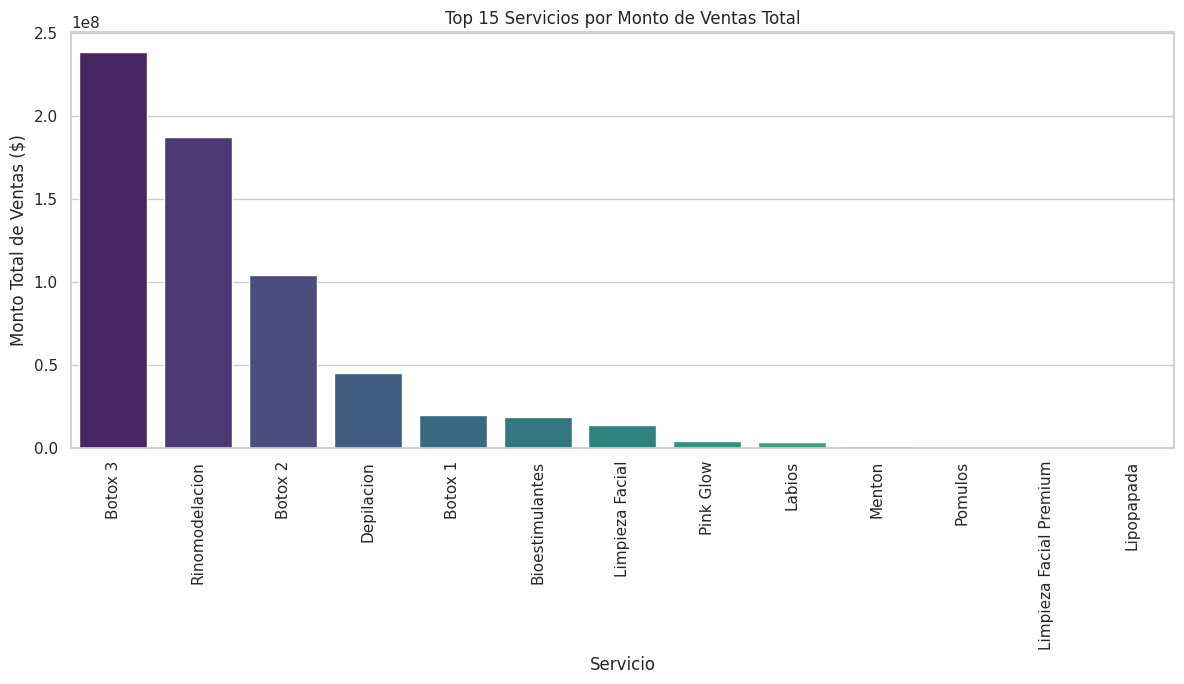


Ventas Totales por Año:


,Año,Monto_Numerico
0,2023,"$226,593,862"
1,2024,"$270,399,223"
2,2025,"$139,568,696"


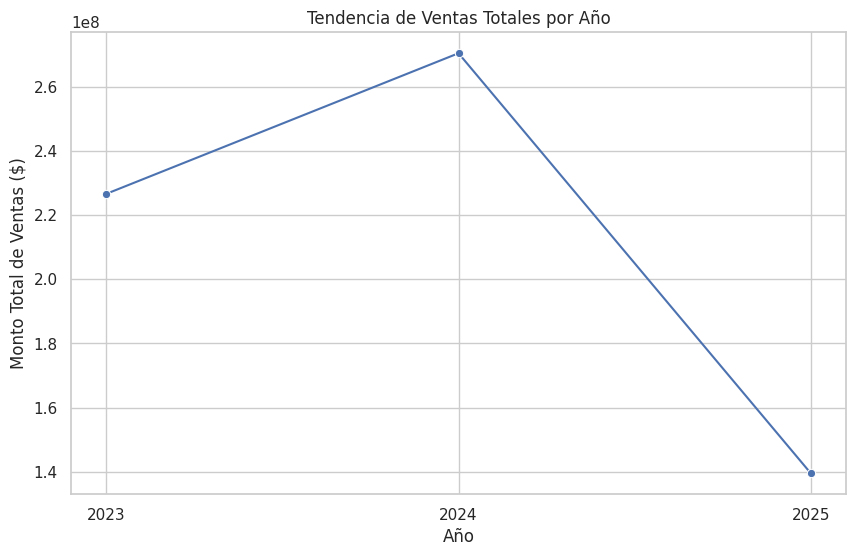


Ventas Totales por Mes (Agregado a lo largo de los años):


,Nombre_Mes,Monto_Numerico
0,January,"$67,141,720"
1,February,"$63,725,407"
2,March,"$68,339,446"
3,April,"$68,644,039"
4,May,"$65,347,477"
5,June,"$44,644,849"
6,July,"$49,940,746"
7,August,"$47,604,975"
8,September,"$40,712,650"
9,October,"$39,689,793"


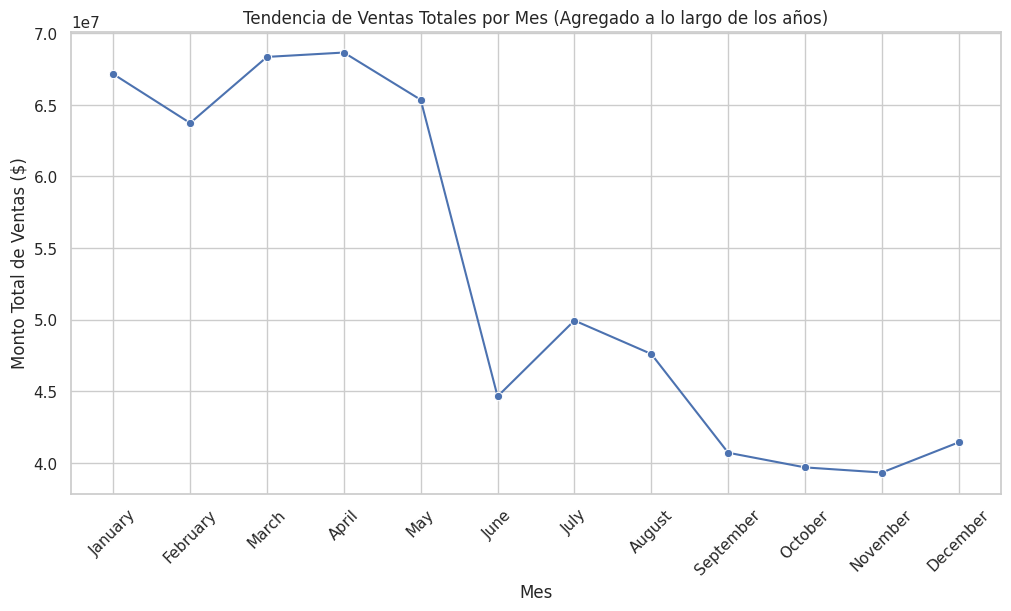


Ventas Totales por Mes y Año:


Año,2023,2024,2025
Mes,,,
1,"$17,584,958","$26,869,643","$22,687,119"
2,"$19,807,405","$20,118,158","$23,799,844"
3,"$20,022,028","$20,451,479","$27,865,939"
4,"$12,139,152","$23,649,500","$32,855,387"
5,"$11,426,762","$21,560,308","$32,360,407"
6,"$22,848,544","$21,796,305",$0
7,"$25,002,790","$24,937,956",$0
8,"$23,776,085","$23,828,890",$0
9,"$18,102,929","$22,609,721",$0


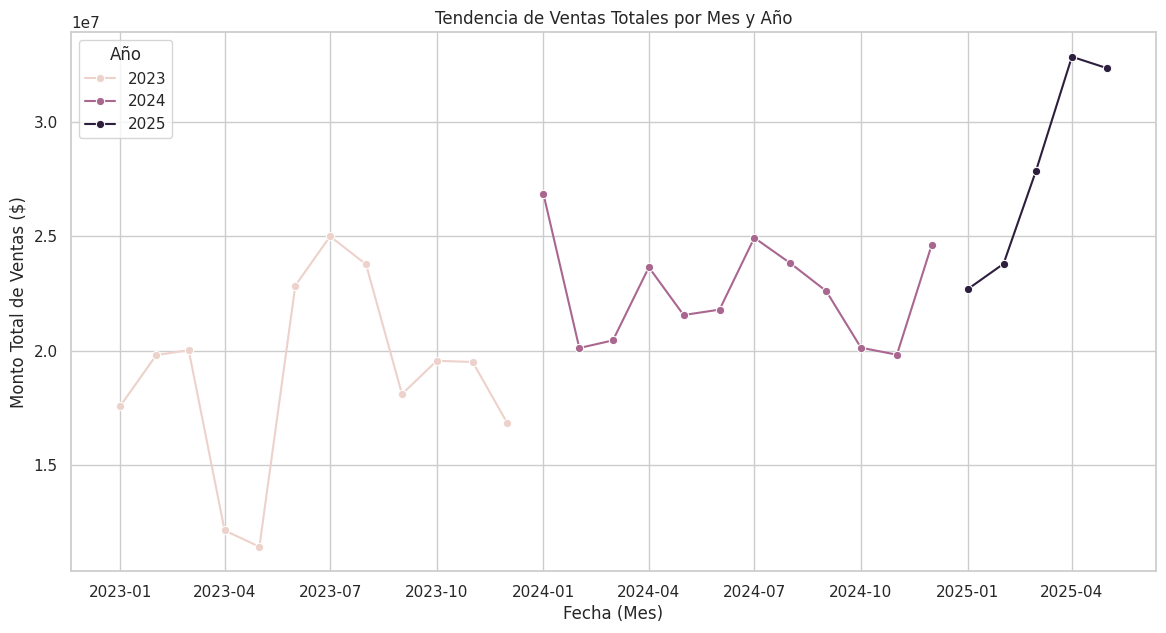


--- Análisis de Concentración de Ventas (Visualización) ---

Análisis de Concentración para el Año: 2023


/tmp/ipython-input-9-2985736658.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Servicio', y='Monto_Numerico', data=ventas_año, palette='viridis')


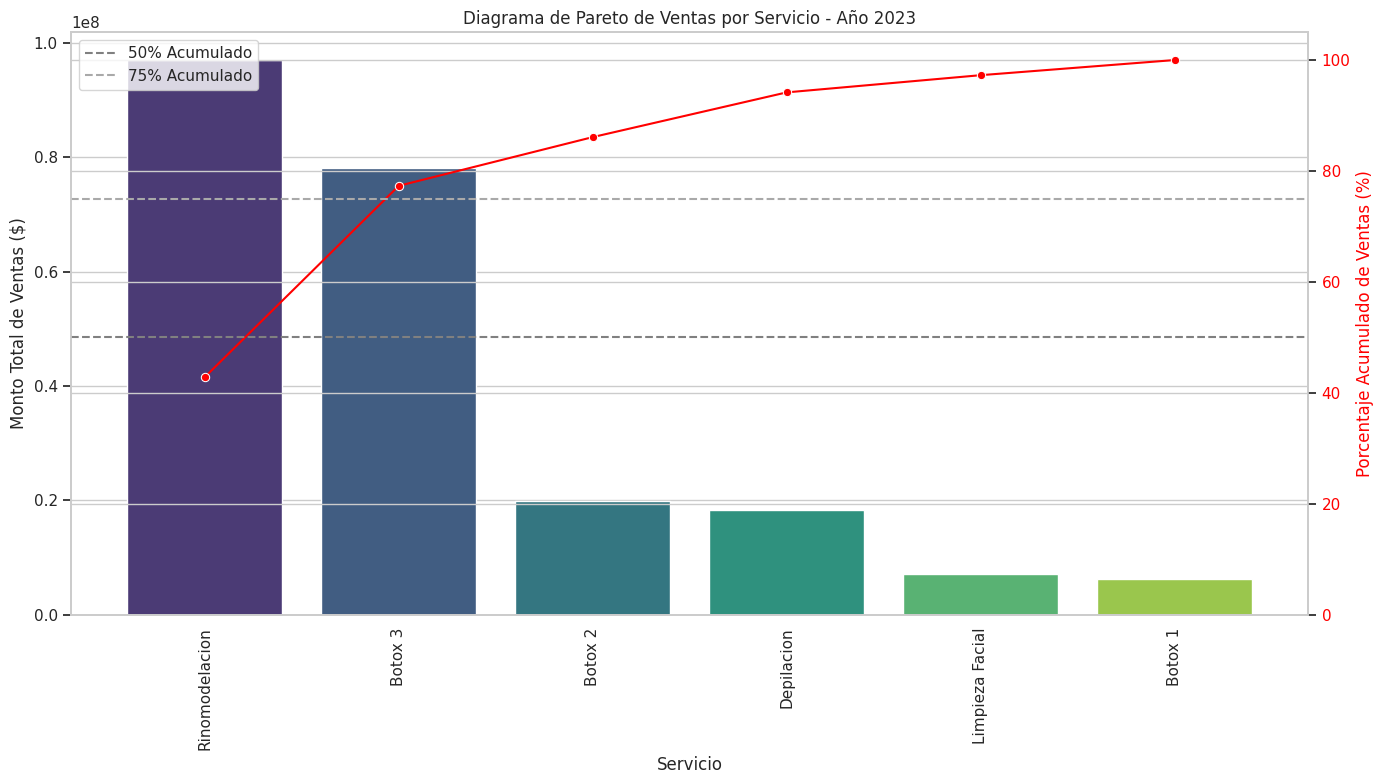

Tabla de Concentración de Ventas para el Año:


,Servicio,Monto_Numerico,Porcentaje_Anual,Porcentaje_Acumulado
0,Rinomodelacion,"$97,033,961",42.82%,42.82%
1,Botox 3,"$78,161,863",34.49%,77.32%
2,Botox 2,"$19,903,764",8.78%,86.10%
3,Depilacion,"$18,280,825",8.07%,94.17%
4,Limpieza Facial,"$7,029,164",3.10%,97.27%
5,Botox 1,"$6,184,285",2.73%,100.00%



Análisis de Concentración para el Año: 2024


/tmp/ipython-input-9-2985736658.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Servicio', y='Monto_Numerico', data=ventas_año, palette='viridis')


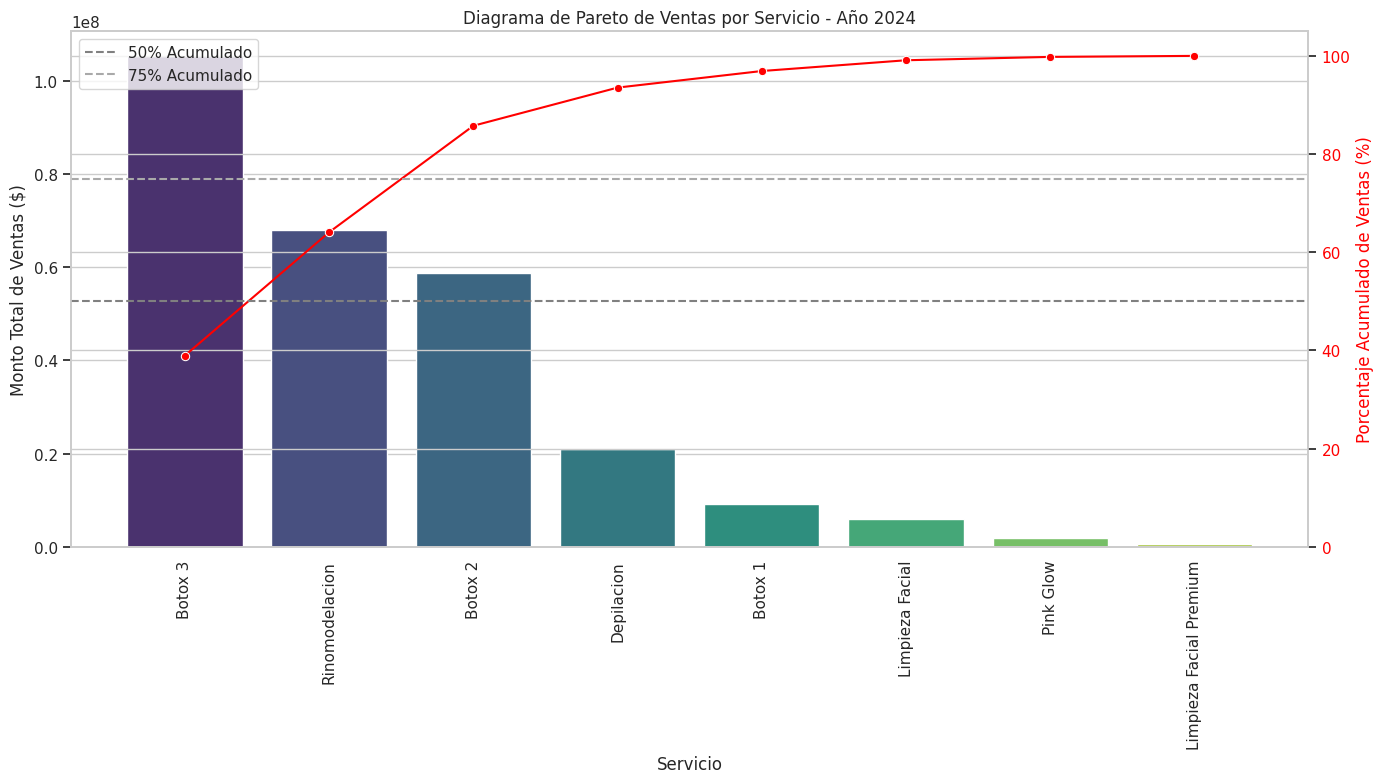

Tabla de Concentración de Ventas para el Año:


,Servicio,Monto_Numerico,Porcentaje_Anual,Porcentaje_Acumulado
0,Botox 3,"$105,346,344",38.96%,38.96%
1,Rinomodelacion,"$67,915,096",25.12%,64.08%
2,Botox 2,"$58,642,845",21.69%,85.76%
3,Depilacion,"$21,019,988",7.77%,93.54%
4,Botox 1,"$9,132,632",3.38%,96.91%
5,Limpieza Facial,"$5,927,853",2.19%,99.11%
6,Pink Glow,"$1,856,324",0.69%,99.79%
7,Limpieza Facial Premium,"$558,141",0.21%,100.00%



Análisis de Concentración para el Año: 2025


/tmp/ipython-input-9-2985736658.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Servicio', y='Monto_Numerico', data=ventas_año, palette='viridis')


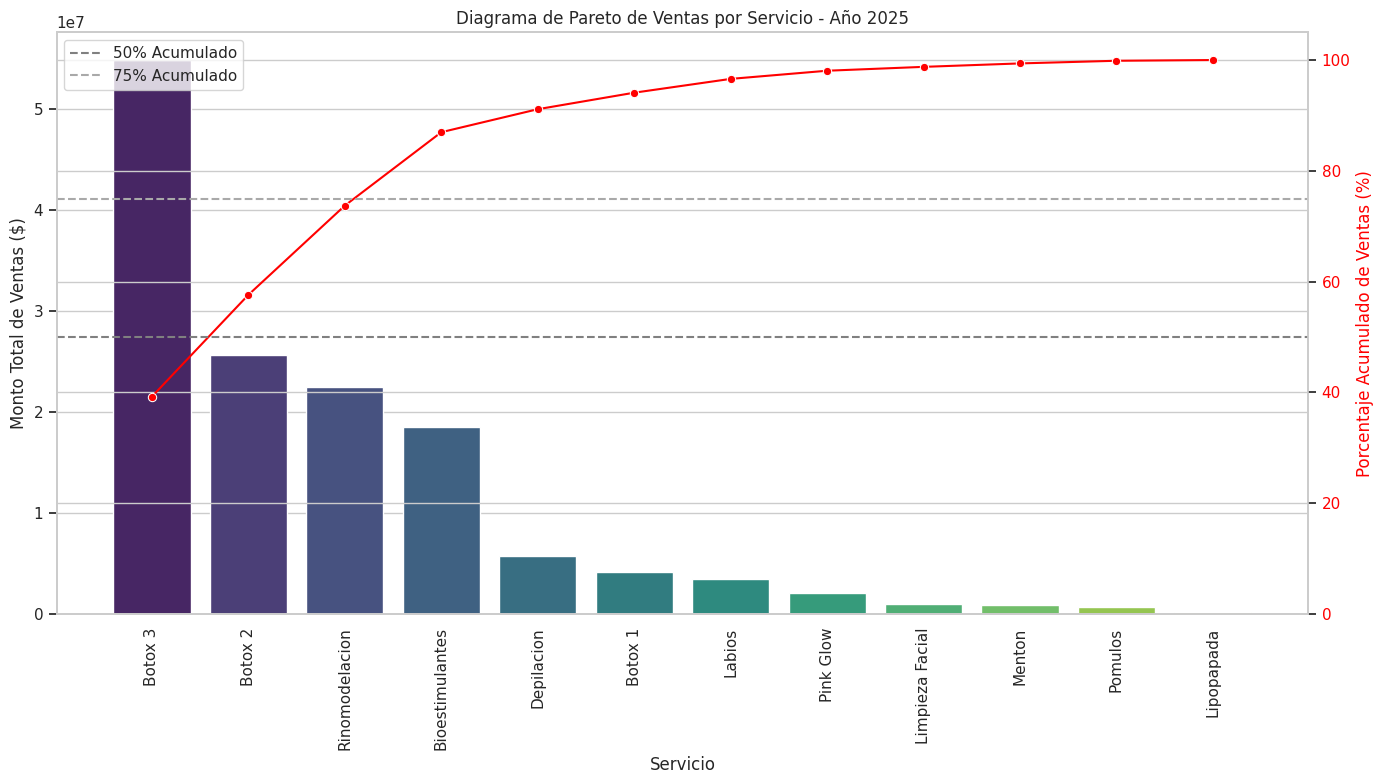

Tabla de Concentración de Ventas para el Año:


,Servicio,Monto_Numerico,Porcentaje_Anual,Porcentaje_Acumulado
0,Botox 3,"$54,805,736",39.27%,39.27%
1,Botox 2,"$25,627,214",18.36%,57.63%
2,Rinomodelacion,"$22,479,028",16.11%,73.74%
3,Bioestimulantes,"$18,481,021",13.24%,86.98%
4,Depilacion,"$5,789,669",4.15%,91.13%
5,Botox 1,"$4,159,210",2.98%,94.11%
6,Labios,"$3,478,456",2.49%,96.60%
7,Pink Glow,"$2,055,000",1.47%,98.07%
8,Limpieza Facial,"$975,037",0.70%,98.77%
9,Menton,"$866,293",0.62%,99.39%


In [9]:
# Assuming 'data' DataFrame is already loaded and cleaned as in the previous successful step

# --- 1. Limpieza y Preparación de Datos ---
# (Keep this section as is from the last working code)

# Asegurarse de que los nombres de las columnas no tengan espacios extra
data.columns = data.columns.str.strip()

# Asegurarse de que la columna de fecha sea de tipo datetime
# Usar el nombre de columna correcto: 'fecha' (con 'f' minúscula)
try:
    # Intentar inferir el formato primero para mayor robustez
    data['Fecha_dt'] = pd.to_datetime(data['fecha'], infer_datetime_format=True)
except Exception:
    print("No se pudo inferir el formato de fecha, intentando con '%d-%m-%Y'")
    # Intentar con el formato conocido, usando errors='coerce' para manejar inválidos
    data['Fecha_dt'] = pd.to_datetime(data['fecha'], format='%d-%m-%Y', errors='coerce')

# Eliminar filas donde la fecha no pudo ser parseada (se convirtió a NaT - Not a Time)
data.dropna(subset=['Fecha_dt'], inplace=True)


# Asegurarse de que la columna 'Monto' esté limpia y sea numérica
# Eliminar el símbolo '$', los puntos y las comas de la columna 'Monto' y convertirla a numérica
# **CORRECCIÓN: Usar pd.to_numeric con errors='coerce'**
data['Monto_Limpio_Str'] = data['Monto'].astype(str).str.replace('$', '', regex=False).str.replace('.', '', regex=False).str.replace(',', '', regex=False)
data['Monto_Numerico'] = pd.to_numeric(data['Monto_Limpio_Str'], errors='coerce')
# Opcional: eliminar la columna temporal 'Monto_Limpio_Str' si ya no la necesitas
# data = data.drop('Monto_Limpio_Str', axis=1)


# Manejar posibles NaN resultantes de la limpieza del monto
# Opción 1: Eliminar filas con Monto_Numerico NaN (si no son muchas)
data.dropna(subset=['Monto_Numerico'], inplace=True)
# Opción 2: Rellenar NaN con 0 o la media (si NaN significa 0 ventas o un valor promedio)
# data['Monto_Numerico'].fillna(0, inplace=True)
# data['Monto_Numerico'].fillna(data['Monto_Numerico'].mean(), inplace=True)

# Asegurarse de que la columna 'Servicio' sea string y manejar posibles NaNs (si los hubiera)
data['Servicio'] = data['Servicio'].astype(str).fillna('Desconocido')


# Crear columnas de tiempo para análisis usando la nueva columna de fecha datetime
data['Año'] = data['Fecha_dt'].dt.year
data['Mes'] = data['Fecha_dt'].dt.month
data['Nombre_Mes'] = data['Fecha_dt'].dt.strftime('%B') # Nombre del mes
data['Semana'] = data['Fecha_dt'].dt.isocalendar().week # Número de semana ISO


print("Preparación de datos completa. Primeras filas del DataFrame limpio:")
# Usar style.format para mostrar Monto_Numerico con formato de moneda
display(data.head().style.format({'Monto_Numerico': '${:,.0f}'})) # Formato: $ + separador de miles + 0 decimales


print("\nInformación del DataFrame después de la limpieza:")
data.info()
print("\nEstadísticas descriptivas de columnas numéricas después de la limpieza:")
display(data.describe().style.format({'Monto_Numerico': '${:,.0f}'})) # Formato: $ + separador de miles + 0 decimales


# --- 2. Exploración Descriptiva ---

print("\n--- Análisis Descriptivo de Ventas ---")

# Ventas Totales por Servicio
print("\nVentas Totales por Servicio:")
# Las series no tienen .style.format, tendrás que convertirlas a DataFrame para usarlo
ventas_por_servicio_df = ventas_por_servicio.reset_index() # Convertir a DataFrame
display(ventas_por_servicio_df.style.format({'Monto_Numerico': '${:,.0f}'}))


# Visualización de Ventas Totales por Servicio (Gráfico, Montos SIN $)
plt.figure(figsize=(12, 7))
n_servicios_a_mostrar = 15
top_servicios = ventas_por_servicio.head(n_servicios_a_mostrar) # Usar la serie original para el gráfico
sns.barplot(x=top_servicios.index, y=top_servicios.values, palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Top {n_servicios_a_mostrar} Servicios por Monto de Ventas Total')
plt.xlabel('Servicio')
plt.ylabel('Monto Total de Ventas ($)') # Añadir $ en la etiqueta del eje
plt.tight_layout()
plt.show()


# Ventas Totales por Año
print("\nVentas Totales por Año:")
# Convertir a DataFrame para formatear
ventas_por_año_df = ventas_por_año.reset_index()
display(ventas_por_año_df.style.format({'Monto_Numerico': '${:,.0f}'}))

# Visualización de Ventas Totales por Año (Gráfico, Montos SIN $)
plt.figure(figsize=(10, 6))
sns.lineplot(x=ventas_por_año.index, y=ventas_por_año.values, marker='o') # Usar la serie original para el gráfico
plt.title('Tendencia de Ventas Totales por Año')
plt.xlabel('Año')
plt.ylabel('Monto Total de Ventas ($)') # Añadir $ en la etiqueta del eje
plt.xticks(ventas_por_año.index)
plt.grid(True)
plt.show()


# Ventas Totales por Mes
print("\nVentas Totales por Mes (Agregado a lo largo de los años):")
# Convertir a DataFrame para formatear
ventas_por_mes_nombre_df = ventas_por_mes_nombre.reset_index()
display(ventas_por_mes_nombre_df.style.format({'Monto_Numerico': '${:,.0f}'}))

# Visualización de Ventas Totales por Mes (Gráfico, Montos SIN $)
plt.figure(figsize=(12, 6))
sns.lineplot(x=ventas_por_mes_nombre.index, y=ventas_por_mes_nombre.values, marker='o') # Usar la serie original para el gráfico
plt.title('Tendencia de Ventas Totales por Mes (Agregado a lo largo de los años)')
plt.xlabel('Mes')
plt.ylabel('Monto Total de Ventas ($)') # Añadir $ en la etiqueta del eje
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print("\nVentas Totales por Mes y Año:")
# La tabla dinámica ya es un DataFrame, solo aplicar formato
display(ventas_por_año_mes.pivot_table(index='Mes', columns='Año', values='Monto_Numerico', fill_value=0).style.format('${:,.0f}'))

# Visualización de Ventas por Año y Mes (Gráfico, Montos SIN $)
plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_por_año_mes, x='Fecha_Mes', y='Monto_Numerico', hue='Año', marker='o')
plt.title('Tendencia de Ventas Totales por Mes y Año')
plt.xlabel('Fecha (Mes)')
plt.ylabel('Monto Total de Ventas ($)') # Añadir $ en la etiqueta del eje
plt.grid(True)
plt.show()


# --- 3. Análisis de Concentración (Visualización) ---

print("\n--- Análisis de Concentración de Ventas (Visualización) ---")

# Reutilizamos los cálculos del análisis de concentración por año
# ventas_por_servicio_año ya está calculado

for año in ventas_por_servicio_año['Año'].unique():
    print(f"\nAnálisis de Concentración para el Año: {año}")

    ventas_año = ventas_por_servicio_año[ventas_por_servicio_año['Año'] == año].copy()
    ventas_año = ventas_año.sort_values(by='Monto_Numerico', ascending=False).reset_index(drop=True)
    total_anual = ventas_año['Monto_Numerico'].sum()
    ventas_año['Porcentaje_Anual'] = (ventas_año['Monto_Numerico'] / total_anual) * 100
    ventas_año['Porcentaje_Acumulado'] = ventas_año['Porcentaje_Anual'].cumsum()

    # --- Visualización del Diagrama de Pareto para cada año (Gráfico, Montos SIN $) ---
    plt.figure(figsize=(14, 8))

    # Gráfico de barras para el monto de ventas por servicio
    barplot = sns.barplot(x='Servicio', y='Monto_Numerico', data=ventas_año, palette='viridis')
    plt.xticks(rotation=90)
    plt.ylabel('Monto Total de Ventas ($)') # Añadir $ en la etiqueta del eje
    plt.title(f'Diagrama de Pareto de Ventas por Servicio - Año {año}')

    ax2 = plt.twinx()
    lineplot = sns.lineplot(x='Servicio', y='Porcentaje_Acumulado', data=ventas_año, marker='o', color='red', ax=ax2, sort=False)
    ax2.set_ylabel('Porcentaje Acumulado de Ventas (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, 105)

    ax2.axhline(50, color='gray', linestyle='--', label='50% Acumulado')
    ax2.axhline(75, color='darkgray', linestyle='--', label='75% Acumulado')
    ax2.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

    # Mostrar la tabla de concentración para el año (con formato de moneda)
    print("Tabla de Concentración de Ventas para el Año:")
    # Aplicar formato a la columna Monto_Numerico
    display(ventas_año[['Servicio', 'Monto_Numerico', 'Porcentaje_Anual', 'Porcentaje_Acumulado']].style.format({
        'Monto_Numerico': '${:,.0f}',
        'Porcentaje_Anual': '{:.2f}%',
        'Porcentaje_Acumulado': '{:.2f}%'
    }))

In [15]:
# Asegurarse de que los nombres de las columnas no tengan espacios extra
data.columns = data.columns.str.strip()

# Asegurarse de que la columna de fecha sea de tipo datetime
# Usar el nombre de columna correcto: 'fecha' (con 'f' minúscula)
try:
    # Strict inference is now the default, remove infer_datetime_format=True
    data['Fecha_dt'] = pd.to_datetime(data['fecha'])
except Exception:
    print("No se pudo inferir el formato de fecha, intentando con '%d-%m-%Y'")
    # Intentar con el formato conocido, usando errors='coerce' para manejar inválidos
    data['Fecha_dt'] = pd.to_datetime(data['fecha'], format='%d-%m-%Y', errors='coerce')

# Eliminar filas donde la fecha no pudo ser parseada (se convirtió a NaT - Not a Time)
data.dropna(subset=['Fecha_dt'], inplace=True)

# --- Drop 'Unnamed' columns if they exist ---
# Identify columns that start with 'Unnamed:'
unnamed_cols = [col for col in data.columns if col.startswith('Unnamed:')]
if unnamed_cols:
    print(f"Eliminando columnas no nombradas: {unnamed_cols}")
    data = data.drop(columns=unnamed_cols)
# --------------------------------------------


# Asegurarse de que la columna 'Monto' esté limpia y sea numérica
# Eliminar el símbolo '$', los puntos y las comas de la columna 'Monto' y convertirla a numérica
# **CORRECCIÓN: Usar pd.to_numeric con errors='coerce'**
data['Monto_Limpio_Str'] = data['Monto'].astype(str).str.replace('$', '', regex=False).str.replace('.', '', regex=False).str.replace(',', '', regex=False)
data['Monto_Numerico'] = pd.to_numeric(data['Monto_Limpio_Str'], errors='coerce')
# Opcional: eliminar la columna temporal 'Monto_Limpio_Str' si ya no la necesitas
# data = data.drop('Monto_Limpio_Str', axis=1)


# Manejar posibles NaN resultantes de la limpieza del monto
# Opción 1: Eliminar filas con Monto_Numerico NaN (si no son muchas)
data.dropna(subset=['Monto_Numerico'], inplace=True)
# Opción 2: Rellenar NaN con 0 o la media (si NaN significa 0 ventas o un valor promedio)
# data['Monto_Numerico'].fillna(0, inplace=True)
# data['Monto_Numerico'].fillna(data['Monto_Numerico'].mean(), inplace=True)

# Asegurarse de que la columna 'Servicio' sea string y manejar posibles NaNs (si los hubiera)
data['Servicio'] = data['Servicio'].astype(str).fillna('Desconocido')


# Crear columnas de tiempo para análisis usando la nueva columna de fecha datetime
data['Año'] = data['Fecha_dt'].dt.year
data['Mes'] = data['Fecha_dt'].dt.month
data['Nombre_Mes'] = data['Fecha_dt'].dt.strftime('%B') # Nombre del mes
data['Semana'] = data['Fecha_dt'].dt.isocalendar().week # Número de semana ISO

# Print a small info or head here to confirm columns exist
print("Columnas después de la preparación:", data.columns)

No se pudo inferir el formato de fecha, intentando con '%d-%m-%Y'
Eliminando columnas no nombradas: ['Unnamed: 5', 'Unnamed: 6']
Columnas después de la preparación: Index(['fecha', 'Monto', 'Servicio', 'Tipo Pago', 'Comision', 'Fecha_dt',
       'Monto_Limpio_Str', 'Monto_Numerico', 'Año', 'Mes', 'Nombre_Mes',
       'Semana'],
      dtype='object')


In [16]:
# Asegurarse de que los nombres de las columnas no tengan espacios extra
data.columns = data.columns.str.strip()

# Asegurarse de que la columna de fecha sea de tipo datetime
# Usar el nombre de columna correcto: 'fecha' (con 'f' minúscula)
try:
    # Strict inference is now the default, remove infer_datetime_format=True
    data['Fecha_dt'] = pd.to_datetime(data['fecha'])
except Exception:
    print("No se pudo inferir el formato de fecha, intentando con '%d-%m-%Y'")
    # Intentar con el formato conocido, usando errors='coerce' para manejar inválidos
    data['Fecha_dt'] = pd.to_datetime(data['fecha'], format='%d-%m-%Y', errors='coerce')

# Eliminar filas donde la fecha no pudo ser parseada (se convirtió a NaT - Not a Time)
data.dropna(subset=['Fecha_dt'], inplace=True)

# --- Drop 'Unnamed' columns if they exist ---
# Identify columns that start with 'Unnamed:'
unnamed_cols = [col for col in data.columns if col.startswith('Unnamed:')]
if unnamed_cols:
    print(f"Eliminando columnas no nombradas: {unnamed_cols}")
    data = data.drop(columns=unnamed_cols)
# --------------------------------------------


# Asegurarse de que la columna 'Monto' esté limpia y sea numérica
# Eliminar el símbolo '$', los puntos y las comas de la columna 'Monto' y convertirla a numérica
# **CORRECCIÓN: Usar pd.to_numeric con errors='coerce'**
data['Monto_Limpio_Str'] = data['Monto'].astype(str).str.replace('$', '', regex=False).str.replace('.', '', regex=False).str.replace(',', '', regex=False)
data['Monto_Numerico'] = pd.to_numeric(data['Monto_Limpio_Str'], errors='coerce')
# Opcional: eliminar la columna temporal 'Monto_Limpio_Str' si ya no la necesitas
# data = data.drop('Monto_Limpio_Str', axis=1)


# Manejar posibles NaN resultantes de la limpieza del monto
# Opción 1: Eliminar filas con Monto_Numerico NaN (si no son muchas)
data.dropna(subset=['Monto_Numerico'], inplace=True)
# Opción 2: Rellenar NaN con 0 o la media (si NaN significa 0 ventas o un valor promedio)
# data['Monto_Numerico'].fillna(0, inplace=True)
# data['Monto_Numerico'].fillna(data['Monto_Numerico'].mean(), inplace=True)

# Asegurarse de que la columna 'Servicio' sea string y manejar posibles NaNs (si los hubiera)
data['Servicio'] = data['Servicio'].astype(str).fillna('Desconocido')


# Crear columnas de tiempo para análisis usando la nueva columna de fecha datetime
data['Año'] = data['Fecha_dt'].dt.year
data['Mes'] = data['Fecha_dt'].dt.month
data['Nombre_Mes'] = data['Fecha_dt'].dt.strftime('%B') # Nombre del mes
data['Semana'] = data['Fecha_dt'].dt.isocalendar().week # Número de semana ISO

# Print a small info or head here to confirm columns exist
print("Columnas después de la preparación:", data.columns)

No se pudo inferir el formato de fecha, intentando con '%d-%m-%Y'
Columnas después de la preparación: Index(['fecha', 'Monto', 'Servicio', 'Tipo Pago', 'Comision', 'Fecha_dt',
       'Monto_Limpio_Str', 'Monto_Numerico', 'Año', 'Mes', 'Nombre_Mes',
       'Semana'],
      dtype='object')


In [17]:
# Asegurarse de que las columnas necesarias estén limpias y preparadas (como en el código anterior)
# Se asume que 'data' ya tiene 'Fecha_dt', 'Año', 'Mes', 'Nombre_Mes' y 'Monto_Numerico'

print("\n--- Análisis de Meses con Mayor Venta y Servicios Principales en esos Meses ---")

# Calcular las ventas totales por Año y Mes
ventas_totales_año_mes = data.groupby(['Año', 'Nombre_Mes', 'Mes'])['Monto_Numerico'].sum().reset_index()

# Para asegurar el orden correcto de los meses en la identificación del mes pico (opcional, pero útil)
meses_ordenados_num = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
ventas_totales_año_mes['Mes_Num'] = ventas_totales_año_mes['Nombre_Mes'].map(meses_ordenados_num)

# Identificar el mes con las ventas máximas para cada año
meses_pico_por_año = ventas_totales_año_mes.loc[ventas_totales_año_mes.groupby('Año')['Monto_Numerico'].idxmax()]


print("Mes con Mayor Venta por Año:")
display(meses_pico_por_año[['Año', 'Nombre_Mes', 'Monto_Numerico']].style.format({'Monto_Numerico': '${:,.0f}'}))

# Para cada año y su mes pico, encontrar los servicios que concentran más del 50%
print("\nAnálisis de Concentración ( > 50%) de Servicios en los Meses Pico por Año:")
for index, row in meses_pico_por_año.iterrows():
    año_pico = row['Año']
    mes_pico_nombre = row['Nombre_Mes']
    mes_pico_num = row['Mes'] # Usar el número del mes para filtrar
    monto_total_mes_pico = row['Monto_Numerico'] # Monto total de este mes pico

    print(f"\n--- Año: {año_pico}, Mes Pico: {mes_pico_nombre} (Total Ventas Mes: ${monto_total_mes_pico:,.0f}) ---")

    # Filtrar los datos originales para el año y mes pico
    data_mes_pico = data[(data['Año'] == año_pico) & (data['Mes'] == mes_pico_num)].copy() # Usar .copy() para evitar SettingWithCopyWarning

    # Calcular las ventas por servicio en este mes pico
    ventas_servicios_mes_pico = data_mes_pico.groupby('Servicio')['Monto_Numerico'].sum().reset_index()

    # Ordenar por ventas descendentes
    ventas_servicios_mes_pico = ventas_servicios_mes_pico.sort_values(by='Monto_Numerico', ascending=False)

    # Calcular el porcentaje de las ventas de cada servicio sobre el total del mes pico
    ventas_servicios_mes_pico['Porcentaje_Mensual'] = (ventas_servicios_mes_pico['Monto_Numerico'] / monto_total_mes_pico) * 100

    # Calcular el porcentaje acumulado dentro del mes pico
    ventas_servicios_mes_pico['Porcentaje_Acumulado_Mensual'] = ventas_servicios_mes_pico['Porcentaje_Mensual'].cumsum()

    # Identificar servicios que concentran el 50% del total del mes pico
    servicios_50_porciento_mes = ventas_servicios_mes_pico[ventas_servicios_mes_pico['Porcentaje_Acumulado_Mensual'] <= 50]['Servicio'].tolist()
    # Incluir el servicio que cruza el umbral del 50% si no está ya incluido
    if ventas_servicios_mes_pico[ventas_servicios_mes_pico['Porcentaje_Acumulado_Mensual'] > 50].shape[0] > 0:
         primer_servicio_despues_50 = ventas_servicios_mes_pico[ventas_servicios_mes_pico['Porcentaje_Acumulado_Mensual'] > 50].iloc[0]['Servicio']
         if primer_servicio_despues_50 not in servicios_50_porciento_mes:
              servicios_50_porciento_mes.append(primer_servicio_despues_50)


    print("Servicios que concentran aproximadamente el 50% de las ventas del mes pico:")
    # Mostrar la tabla con los detalles para estos servicios, reseteando el índice
    ventas_50_porciento_mes_df = ventas_servicios_mes_pico[ventas_servicios_mes_pico['Servicio'].isin(servicios_50_porciento_mes)].reset_index(drop=True)

    display(ventas_50_porciento_mes_df[['Servicio', 'Monto_Numerico', 'Porcentaje_Mensual', 'Porcentaje_Acumulado_Mensual']].style.format({
        'Monto_Numerico': '${:,.0f}',
        'Porcentaje_Mensual': '{:.2f}%',
        'Porcentaje_Acumulado_Mensual': '{:.2f}%'
    }))

    # Opcional: Mostrar todos los servicios en el mes pico con su contribución
    # print("\nDetalle de Ventas por Servicio en el Mes Pico:")
    # display(ventas_servicios_mes_pico.reset_index(drop=True).style.format({
    #     'Monto_Numerico': '${:,.0f}',
    #     'Porcentaje_Mensual': '{:.2f}%',
    #     'Porcentaje_Acumulado_Mensual': '{:.2f}%'
    # }))


--- Análisis de Meses con Mayor Venta y Servicios Principales en esos Meses ---
Mes con Mayor Venta por Año:


,Año,Nombre_Mes,Monto_Numerico
5,2023,July,"$25,002,790"
16,2024,January,"$26,869,643"
24,2025,April,"$32,855,387"



Análisis de Concentración ( > 50%) de Servicios en los Meses Pico por Año:

--- Año: 2023, Mes Pico: July (Total Ventas Mes: $25,002,790) ---
Servicios que concentran aproximadamente el 50% de las ventas del mes pico:


,Servicio,Monto_Numerico,Porcentaje_Mensual,Porcentaje_Acumulado_Mensual
0,Botox 3,"$11,397,429",45.58%,45.58%
1,Rinomodelacion,"$8,744,300",34.97%,80.56%



--- Año: 2024, Mes Pico: January (Total Ventas Mes: $26,869,643) ---
Servicios que concentran aproximadamente el 50% de las ventas del mes pico:


,Servicio,Monto_Numerico,Porcentaje_Mensual,Porcentaje_Acumulado_Mensual
0,Botox 3,"$8,270,888",30.78%,30.78%
1,Rinomodelacion,"$8,034,043",29.90%,60.68%



--- Año: 2025, Mes Pico: April (Total Ventas Mes: $32,855,387) ---
Servicios que concentran aproximadamente el 50% de las ventas del mes pico:


,Servicio,Monto_Numerico,Porcentaje_Mensual,Porcentaje_Acumulado_Mensual
0,Botox 3,"$13,649,016",41.54%,41.54%
1,Botox 2,"$5,809,304",17.68%,59.22%


In [19]:
# Asegurarse de que las columnas necesarias estén limpias y preparadas (como en el código anterior)
# Se asume que 'data' ya tiene 'Fecha_dt', 'Año', 'Mes', 'Nombre_Mes' y 'Monto_Numerico'

print("\n--- Análisis de Meses con Mayor Venta y Servicios Principales en esos Meses (con Visualización) ---")

# Calcular las ventas totales por Año y Mes
ventas_totales_año_mes = data.groupby(['Año', 'Nombre_Mes', 'Mes'])['Monto_Numerico'].sum().reset_index()

# Para asegurar el orden correcto de los meses en la identificación del mes pico (opcional, pero útil)
meses_ordenados_num = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
ventas_totales_año_mes['Mes_Num'] = ventas_totales_año_mes['Nombre_Mes'].map(meses_ordenados_num)

# Identificar el mes con las ventas máximas para cada año
meses_pico_por_año = ventas_totales_año_mes.loc[ventas_totales_año_mes.groupby('Año')['Monto_Numerico'].idxmax()]


print("Mes con Mayor Venta por Año:")
display(meses_pico_por_año[['Año', 'Nombre_Mes', 'Monto_Numerico']].style.format({'Monto_Numerico': '${:,.0f}'}))

# Para cada año y su mes pico, encontrar los servicios que concentran más del 50% y visualizarlos
print("\nAnálisis de Concentración ( > 50%) de Servicios en los Meses Pico por Año (con Visualización):")
for index, row in meses_pico_por_año.iterrows():
    año_pico = row['Año']
    mes_pico_nombre = row['Nombre_Mes']
    mes_pico_num = row['Mes'] # Usar el número del mes para filtrar
    monto_total_mes_pico = row['Monto_Numerico'] # Monto total de este mes pico

    print(f"\n--- Año: {año_pico}, Mes Pico: {mes_pico_nombre} (Total Ventas Mes: ${monto_total_mes_pico:,.0f}) ---")

    # Filtrar los datos originales para el año y mes pico
    data_mes_pico = data[(data['Año'] == año_pico) & (data['Mes'] == mes_pico_num)].copy()

    # Calcular las ventas por servicio en este mes pico
    ventas_servicios_mes_pico = data_mes_pico.groupby('Servicio')['Monto_Numerico'].sum().reset_index()

    # Ordenar por ventas descendentes para el gráfico
    ventas_servicios_mes_pico = ventas_servicios_mes_pico.sort_values(by='Monto_Numerico', ascending=False)

    # Calcular el porcentaje de las ventas de cada servicio sobre el total del mes pico
    ventas_servicios_mes_pico['Porcentaje_Mensual'] = (ventas_servicios_mes_pico['Monto_Numerico'] / monto_total_mes_pico) * 100

    # Calcular el porcentaje acumulado dentro del mes pico
    ventas_servicios_mes_pico['Porcentaje_Acumulado_Mensual'] = ventas_servicios_mes_pico['Porcentaje_Mensual'].cumsum()


    # --- Visualización de Ventas por Servicio en el Mes Pico ---
    plt.figure(figsize=(12, 7))
    # Podemos mostrar todos los servicios o solo los top N si hay muchos
    n_servicios_a_mostrar_mes_pico = 15 # Ajusta si es necesario
    servicios_para_grafico = ventas_servicios_mes_pico.head(n_servicios_a_mostrar_mes_pico)

    sns.barplot(x='Servicio', y='Monto_Numerico', data=servicios_para_grafico, palette='viridis')
    plt.xticks(rotation=90)
    plt.title(f'Ventas por Servicio en {mes_pico_nombre} de {año_pico} (Mes Pico)')
    plt.xlabel('Servicio')
    plt.ylabel('Monto Total de Ventas ($)') # Etiqueta del eje Y con símbolo
    plt.tight_layout()
    plt.show()
    # -------------------------------------------------------


    # Identificar servicios que concentran el 50% del total del mes pico (misma lógica que antes)
    servicios_50_porciento_mes = ventas_servicios_mes_pico[ventas_servicios_mes_pico['Porcentaje_Acumulado_Mensual'] <= 50]['Servicio'].tolist()
    # Incluir el servicio que cruza el umbral del 50% si no está ya incluido
    if ventas_servicios_mes_pico[ventas_servicios_mes_pico['Porcentaje_Acumulado_Mensual'] > 50].shape[0] > 0:
         primer_servicio_despues_50 = ventas_servicios_mes_pico[ventas_servicios_mes_pico['Porcentaje_Acumulado_Mensual'] > 50].iloc[0]['Servicio']
         if primer_servicio_despues_50 not in servicios_50_porciento_mes:
              servicios_50_porciento_mes.append(primer_servicio_despues_50)


    print("Servicios que concentran aproximadamente el 50% de las ventas del mes pico:")
    # Mostrar la tabla con los detalles para estos servicios, reseteando el índice
    ventas_50_porciento_mes_df = ventas_servicios_mes_pico[ventas_servicios_mes_pico['Servicio'].isin(servicios_50_porciento_mes)].reset_index(drop=True)

    display(ventas_50_porciento_mes_df[['Servicio', 'Monto_Numerico', 'Porcentaje_Mensual', 'Porcentaje_Acumulado_Mensual']].style.format({
        'Monto_Numerico': '${:,.0f}',
        'Porcentaje_Mensual': '{:.2f}%',
        'Porcentaje_Acumulado_Mensual': '{:.2f}%'
    }))

    # Opcional: Mostrar todos los servicios en el mes pico con su contribución
    # print("\nDetalle de Ventas por Servicio en el Mes Pico:")
    # display(ventas_servicios_mes_pico.reset_index(drop=True).style.format({
    #     'Monto_Numerico': '${:,.0f}',
    #     'Porcentaje_Mensual': '{:.2f}%',
    #     'Porcentaje_Acumulado_Mensual': '{:.2f}%'
    # }))

# Asegúrate de que plt.show() esté al final de cada bloque de gráfico para que se muestre inmediatamente


--- Análisis de Meses con Mayor Venta y Servicios Principales en esos Meses (con Visualización) ---
Mes con Mayor Venta por Año:


,Año,Nombre_Mes,Monto_Numerico
5,2023,July,"$25,002,790"
16,2024,January,"$26,869,643"
24,2025,April,"$32,855,387"



Análisis de Concentración ( > 50%) de Servicios en los Meses Pico por Año (con Visualización):

--- Año: 2023, Mes Pico: July (Total Ventas Mes: $25,002,790) ---


NameError: name 'plt' is not defined

In [20]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualización (opcional)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6)) # Tamaño por defecto de los gráficos

# --- 1. Limpieza y Preparación de Datos ---
# ... rest of the cleaning code ...

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Librerías importadas.
Datos cargados correctamente.


,fecha,Monto,Servicio,Tipo Pago,Comision,Unnamed: 5,Unnamed: 6
0,03-01-2024,$27.683,Depilacion,Transferencia Banco Estado,0,NaN,NaN
1,03-01-2024,$94.515,Depilacion,Transferencia Banco Estado,0,NaN,NaN
2,03-01-2024,$27.683,Depilacion,Transferencia Banco Estado,0,NaN,NaN
3,03-01-2024,$69.628,Depilacion,Transferencia Banco Estado,0,NaN,NaN
4,03-01-2024,$139.256,Depilacion,Credito,0,NaN,NaN



--- Iniciando Limpieza y Preparación de Datos ---
Nombres de columnas limpiados.
No se pudo inferir el formato de fecha, intentando con '%d-%m-%Y'
Columna 'fecha' convertida a datetime usando formato explícito.
Eliminando columnas no nombradas: ['Unnamed: 5', 'Unnamed: 6']
Columna 'Monto' limpiada y convertida a numérica.
Columna 'Servicio' asegurada como string y NaNs manejados.
Columnas de tiempo ('Año', 'Mes', 'Nombre_Mes', 'Semana') creadas.

Preparación de datos completa. Primeras filas del DataFrame limpio:


,fecha,Monto,Servicio,Tipo Pago,Comision,Fecha_dt,Monto_Limpio_Str,Monto_Numerico,Año,Mes,Nombre_Mes,Semana
0,03-01-2024,$27.683,Depilacion,Transferencia Banco Estado,0,2024-01-03 00:00:00,27683,"$27,683",2024,1,January,1
1,03-01-2024,$94.515,Depilacion,Transferencia Banco Estado,0,2024-01-03 00:00:00,94515,"$94,515",2024,1,January,1
2,03-01-2024,$27.683,Depilacion,Transferencia Banco Estado,0,2024-01-03 00:00:00,27683,"$27,683",2024,1,January,1
3,03-01-2024,$69.628,Depilacion,Transferencia Banco Estado,0,2024-01-03 00:00:00,69628,"$69,628",2024,1,January,1
4,03-01-2024,$139.256,Depilacion,Credito,0,2024-01-03 00:00:00,139256,"$139,256",2024,1,January,1



Información del DataFrame después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha             3095 non-null   object        
 1   Monto             3095 non-null   object        
 2   Servicio          3095 non-null   object        
 3   Tipo Pago         3095 non-null   object        
 4   Comision          3095 non-null   object        
 5   Fecha_dt          3095 non-null   datetime64[ns]
 6   Monto_Limpio_Str  3095 non-null   object        
 7   Monto_Numerico    3095 non-null   int64         
 8   Año               3095 non-null   int32         
 9   Mes               3095 non-null   int32         
 10  Nombre_Mes        3095 non-null   object        
 11  Semana            3095 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), int32(2), int64(1), object(7)
memory usage: 257.

,Fecha_dt,Monto_Numerico,Año,Mes,Semana
count,3095,"$3,095",3095.000000,3095.000000,3095.000000
mean,2024-03-04 21:24:08.142164736,"$205,674",2023.774475,5.323748,21.435218
min,2023-01-02 00:00:00,"$2,768",2023.000000,1.000000,1.000000
25%,2023-06-22 00:00:00,"$69,628",2023.000000,2.000000,8.000000
50%,2024-03-21 00:00:00,"$237,406",2024.000000,5.000000,18.000000
75%,2024-10-25 00:00:00,"$335,276",2024.000000,8.000000,33.000000
max,2025-05-31 00:00:00,"$1,202,409",2025.000000,12.000000,52.000000
std,nan,"$140,792",0.732164,3.443496,14.988131



--- Análisis Descriptivo de Ventas ---

Ventas Totales por Servicio:


,Servicio,Monto_Numerico
0,Botox 3,"$238,313,943"
1,Rinomodelacion,"$187,428,085"
2,Botox 2,"$104,173,823"
3,Depilacion,"$45,090,482"
4,Botox 1,"$19,476,127"
5,Bioestimulantes,"$18,481,021"
6,Limpieza Facial,"$13,932,054"
7,Pink Glow,"$3,911,324"
8,Labios,"$3,478,456"
9,Menton,"$866,293"


/tmp/ipython-input-21-1435115395.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_servicios.index, y=top_servicios.values, palette='viridis')


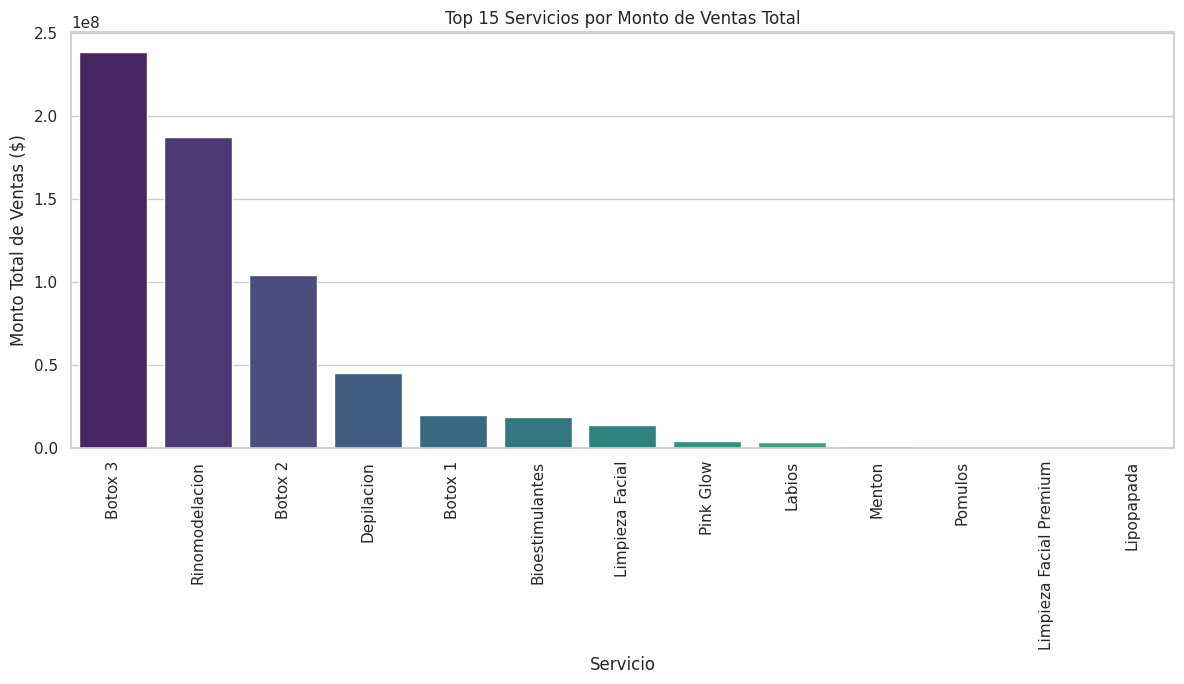


Ventas Totales por Año:


,Año,Monto_Numerico
0,2023,"$226,593,862"
1,2024,"$270,399,223"
2,2025,"$139,568,696"


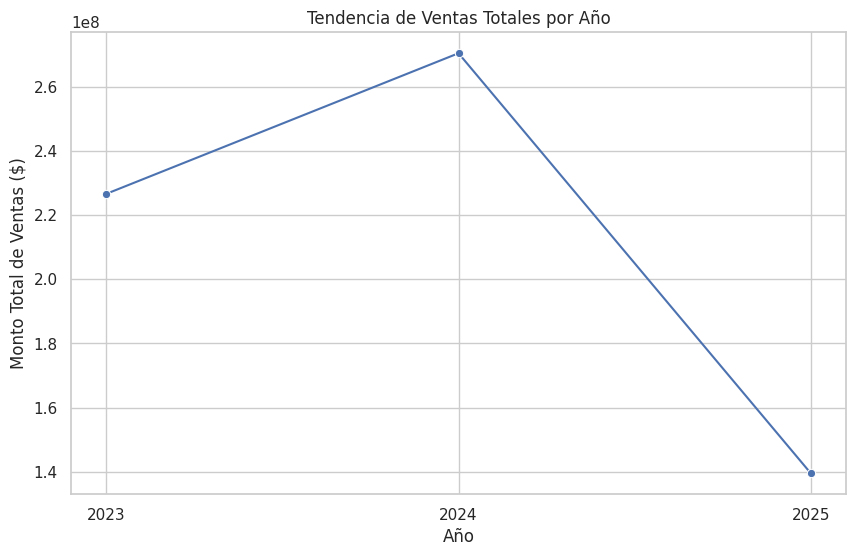


Ventas Totales por Mes (Agregado a lo largo de los años):


,Nombre_Mes,Monto_Numerico
0,January,"$67,141,720"
1,February,"$63,725,407"
2,March,"$68,339,446"
3,April,"$68,644,039"
4,May,"$65,347,477"
5,June,"$44,644,849"
6,July,"$49,940,746"
7,August,"$47,604,975"
8,September,"$40,712,650"
9,October,"$39,689,793"


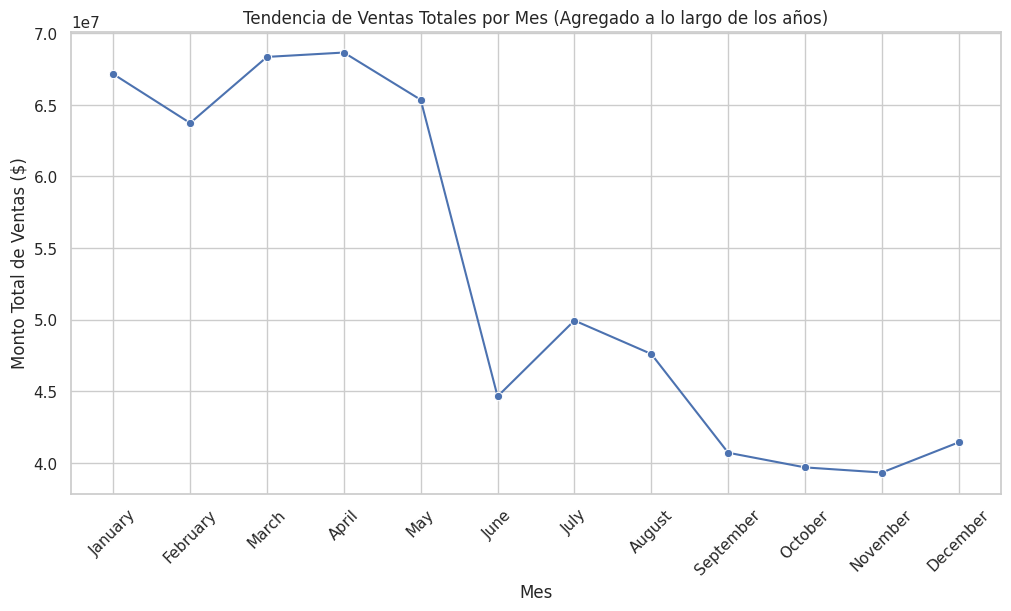


Ventas Totales por Mes y Año:


Año,2023,2024,2025
Mes,,,
1,"$17,584,958","$26,869,643","$22,687,119"
2,"$19,807,405","$20,118,158","$23,799,844"
3,"$20,022,028","$20,451,479","$27,865,939"
4,"$12,139,152","$23,649,500","$32,855,387"
5,"$11,426,762","$21,560,308","$32,360,407"
6,"$22,848,544","$21,796,305",$0
7,"$25,002,790","$24,937,956",$0
8,"$23,776,085","$23,828,890",$0
9,"$18,102,929","$22,609,721",$0


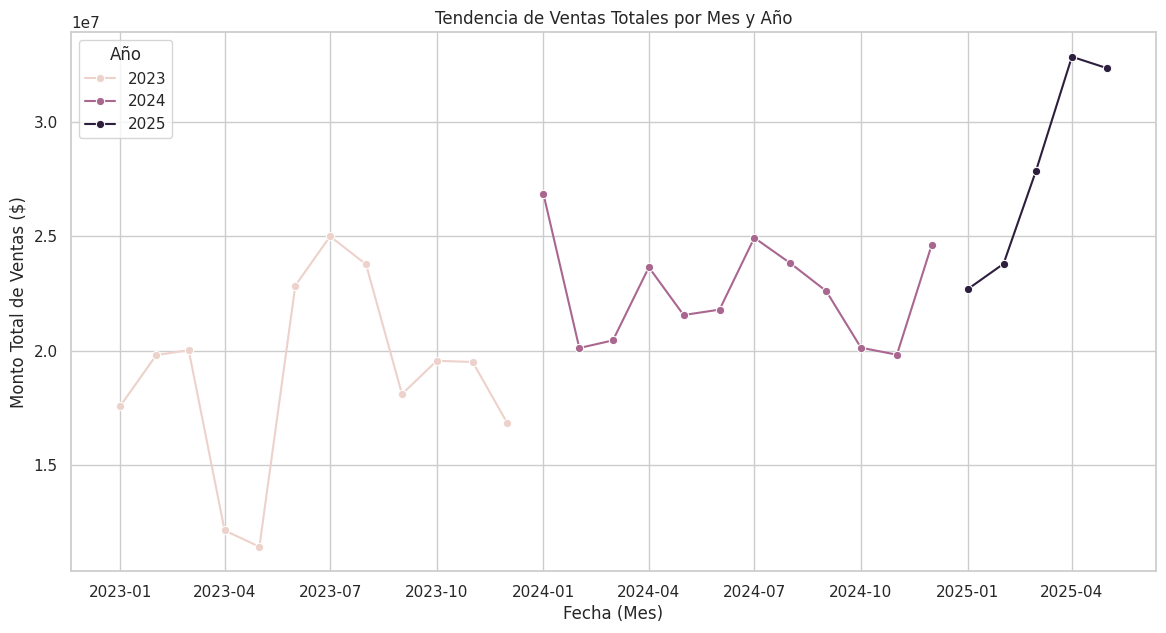


--- Análisis de Concentración de Ventas (Visualización) ---

Análisis de Concentración para el Año: 2023


/tmp/ipython-input-21-1435115395.py:217: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Servicio', y='Monto_Numerico', data=ventas_año, palette='viridis')


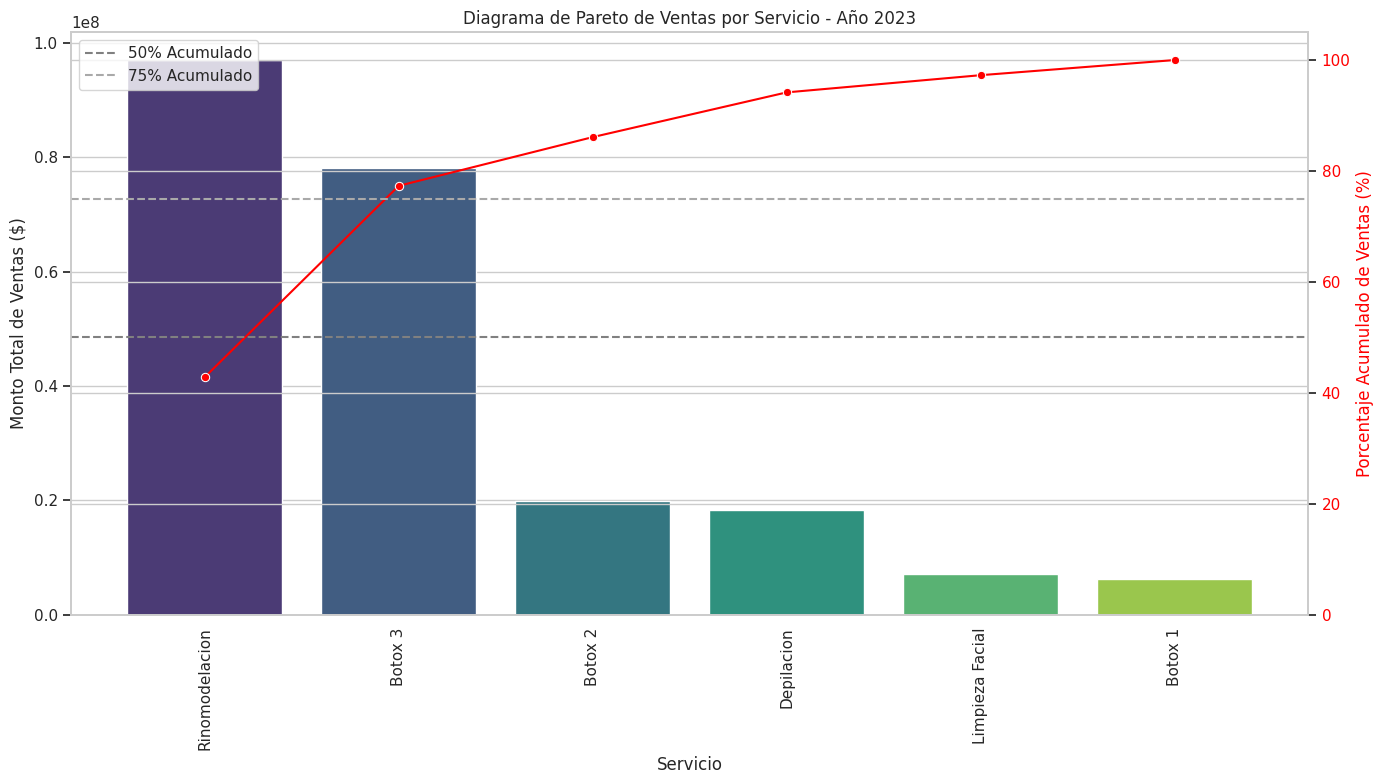

Tabla de Concentración de Ventas para el Año:


,Servicio,Monto_Numerico,Porcentaje_Anual,Porcentaje_Acumulado
0,Rinomodelacion,"$97,033,961",42.82%,42.82%
1,Botox 3,"$78,161,863",34.49%,77.32%
2,Botox 2,"$19,903,764",8.78%,86.10%
3,Depilacion,"$18,280,825",8.07%,94.17%
4,Limpieza Facial,"$7,029,164",3.10%,97.27%
5,Botox 1,"$6,184,285",2.73%,100.00%



Análisis de Concentración para el Año: 2024


/tmp/ipython-input-21-1435115395.py:217: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Servicio', y='Monto_Numerico', data=ventas_año, palette='viridis')


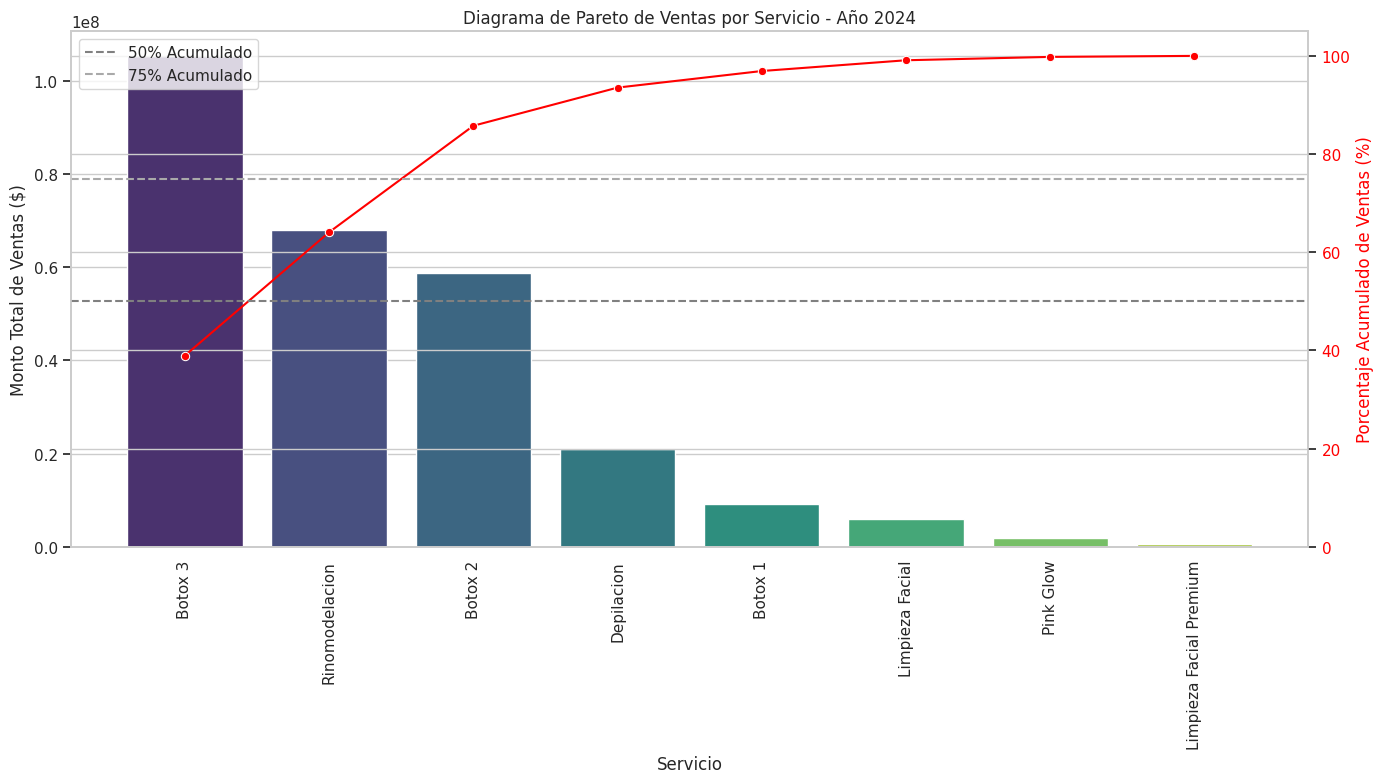

Tabla de Concentración de Ventas para el Año:


,Servicio,Monto_Numerico,Porcentaje_Anual,Porcentaje_Acumulado
0,Botox 3,"$105,346,344",38.96%,38.96%
1,Rinomodelacion,"$67,915,096",25.12%,64.08%
2,Botox 2,"$58,642,845",21.69%,85.76%
3,Depilacion,"$21,019,988",7.77%,93.54%
4,Botox 1,"$9,132,632",3.38%,96.91%
5,Limpieza Facial,"$5,927,853",2.19%,99.11%
6,Pink Glow,"$1,856,324",0.69%,99.79%
7,Limpieza Facial Premium,"$558,141",0.21%,100.00%



Análisis de Concentración para el Año: 2025


/tmp/ipython-input-21-1435115395.py:217: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Servicio', y='Monto_Numerico', data=ventas_año, palette='viridis')


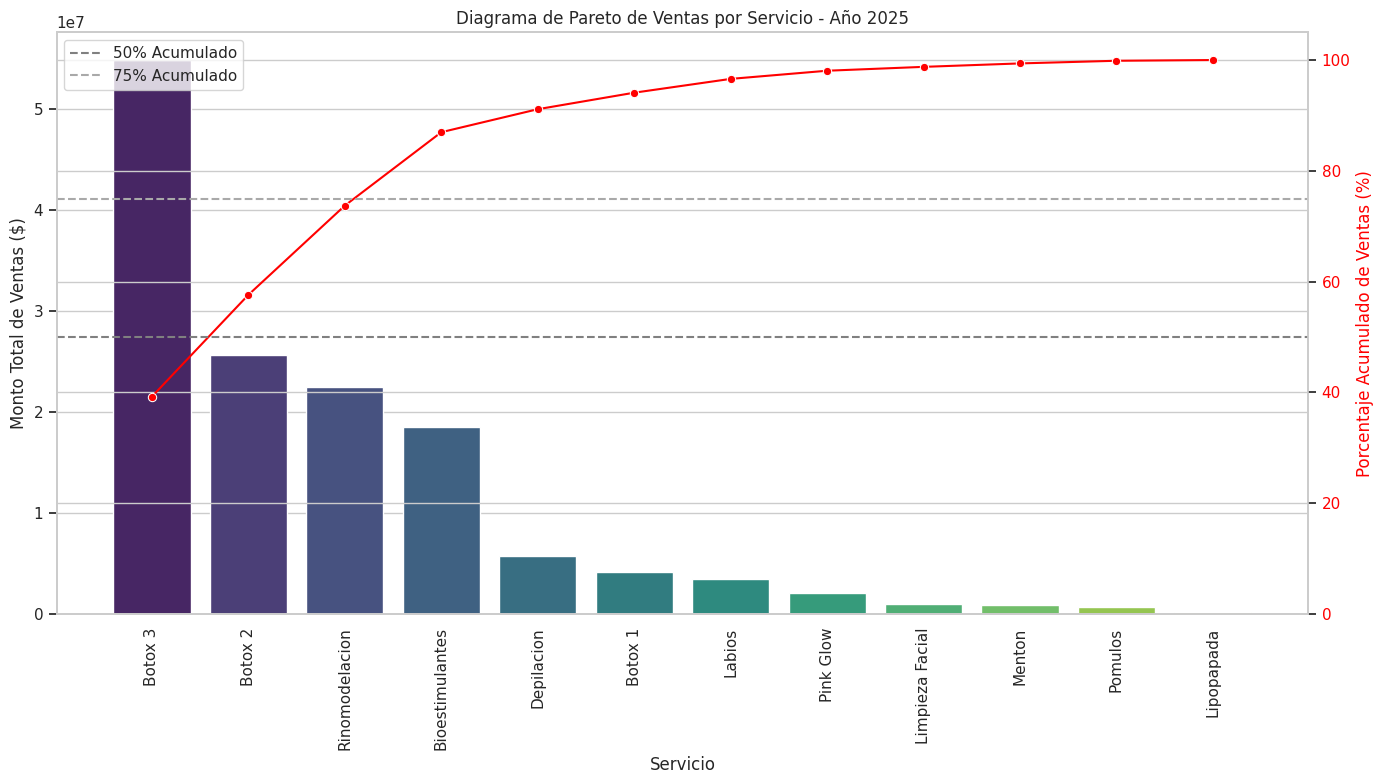

Tabla de Concentración de Ventas para el Año:


,Servicio,Monto_Numerico,Porcentaje_Anual,Porcentaje_Acumulado
0,Botox 3,"$54,805,736",39.27%,39.27%
1,Botox 2,"$25,627,214",18.36%,57.63%
2,Rinomodelacion,"$22,479,028",16.11%,73.74%
3,Bioestimulantes,"$18,481,021",13.24%,86.98%
4,Depilacion,"$5,789,669",4.15%,91.13%
5,Botox 1,"$4,159,210",2.98%,94.11%
6,Labios,"$3,478,456",2.49%,96.60%
7,Pink Glow,"$2,055,000",1.47%,98.07%
8,Limpieza Facial,"$975,037",0.70%,98.77%
9,Menton,"$866,293",0.62%,99.39%



--- Análisis de Meses con Mayor Venta y Servicios Principales en esos Meses (con Visualización) ---
Mes con Mayor Venta por Año:


,Año,Nombre_Mes,Monto_Numerico
5,2023,July,"$25,002,790"
16,2024,January,"$26,869,643"
24,2025,April,"$32,855,387"



Análisis de Concentración ( > 50%) de Servicios en los Meses Pico por Año (con Visualización):

--- Año: 2023, Mes Pico: July (Total Ventas Mes: $25,002,790) ---


/tmp/ipython-input-21-1435115395.py:306: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Servicio', y='Monto_Numerico', data=servicios_para_grafico, palette='viridis')


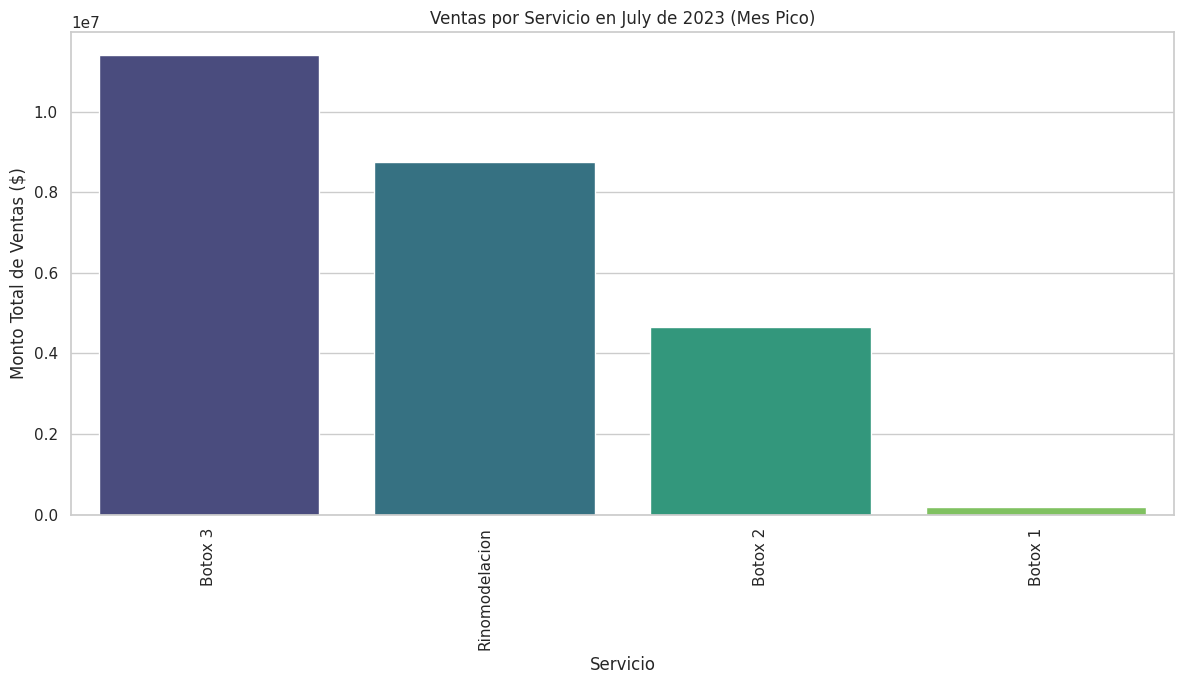

Servicios que concentran aproximadamente el 50% de las ventas del mes pico:


,Servicio,Monto_Numerico,Porcentaje_Mensual,Porcentaje_Acumulado_Mensual
0,Botox 3,"$11,397,429",45.58%,45.58%
1,Rinomodelacion,"$8,744,300",34.97%,80.56%



--- Año: 2024, Mes Pico: January (Total Ventas Mes: $26,869,643) ---


/tmp/ipython-input-21-1435115395.py:306: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Servicio', y='Monto_Numerico', data=servicios_para_grafico, palette='viridis')


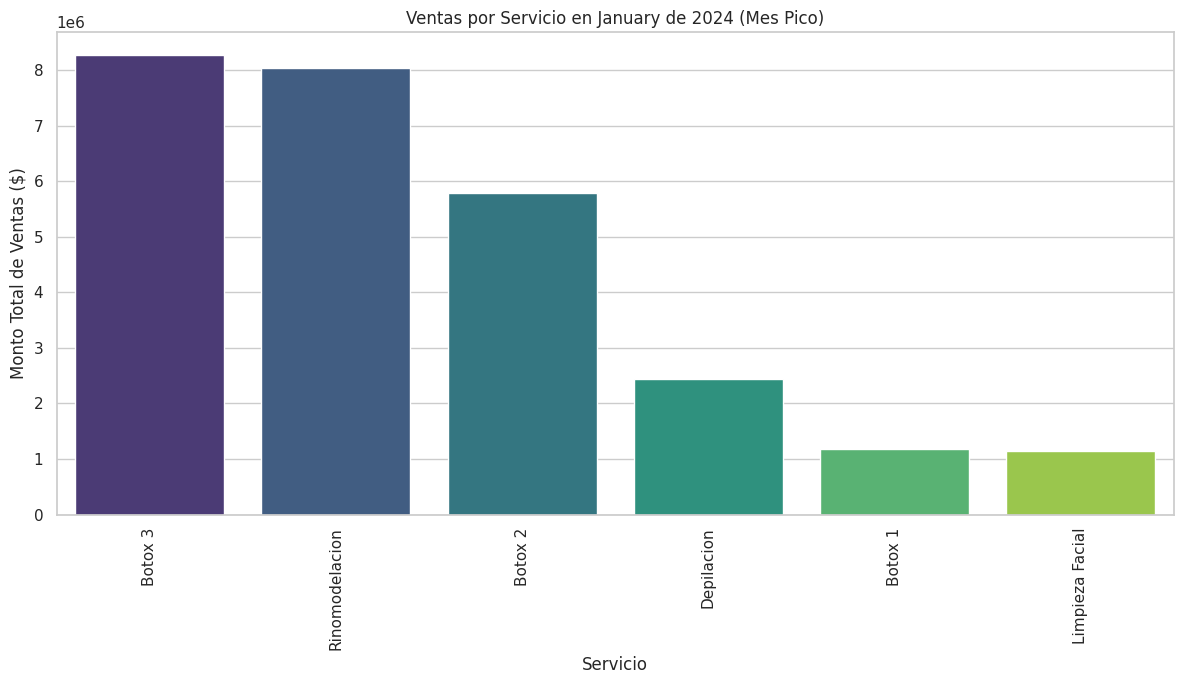

Servicios que concentran aproximadamente el 50% de las ventas del mes pico:


,Servicio,Monto_Numerico,Porcentaje_Mensual,Porcentaje_Acumulado_Mensual
0,Botox 3,"$8,270,888",30.78%,30.78%
1,Rinomodelacion,"$8,034,043",29.90%,60.68%



--- Año: 2025, Mes Pico: April (Total Ventas Mes: $32,855,387) ---


/tmp/ipython-input-21-1435115395.py:306: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Servicio', y='Monto_Numerico', data=servicios_para_grafico, palette='viridis')


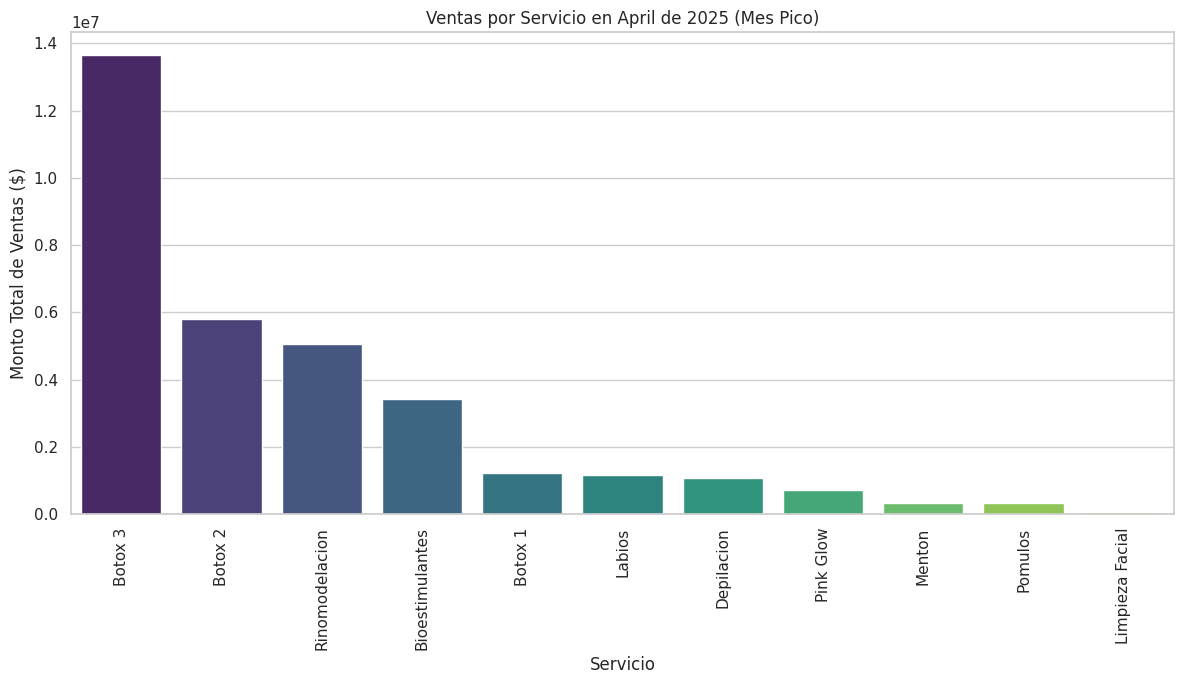

Servicios que concentran aproximadamente el 50% de las ventas del mes pico:


,Servicio,Monto_Numerico,Porcentaje_Mensual,Porcentaje_Acumulado_Mensual
0,Botox 3,"$13,649,016",41.54%,41.54%
1,Botox 2,"$5,809,304",17.68%,59.22%


In [21]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualización (opcional)
sns.set(style="whitegrid")
# Puedes ajustar el tamaño general de los gráficos si es necesario, o dejarlo por defecto
# plt.figure(figsize=(10, 6))

print("Librerías importadas.")

# --- Cargar Datos ---
# Asegúrate de que la ruta al archivo CSV sea correcta
try:
    data = pd.read_csv('/content/sample_data/Ventasoriginal.csv', sep=';') # Especificar el delimitador de punto y coma
    print("Datos cargados correctamente.")
    display(data.head())
except FileNotFoundError:
    print("Error: El archivo 'Ventasoriginal.csv' no se encontró en la ruta especificada.")
    # Puedes salir o manejar el error de otra manera si el archivo no está
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")
    # Manejar otros posibles errores de carga

# --- 1. Limpieza y Preparación de Datos ---
if 'data' in locals(): # Proceder solo si el DataFrame 'data' fue cargado
    print("\n--- Iniciando Limpieza y Preparación de Datos ---")

    # Asegurarse de que los nombres de las columnas no tengan espacios extra
    data.columns = data.columns.str.strip()
    print("Nombres de columnas limpiados.")

    # Asegurarse de que la columna de fecha sea de tipo datetime
    # Usar el nombre de columna correcto: 'fecha' (con 'f' minúscula)
    # Eliminar infer_datetime_format ya que es obsoleto y strict es el nuevo default
    try:
        # Intentar la conversión con strict=True por defecto
        data['Fecha_dt'] = pd.to_datetime(data['fecha'])
        print("Columna 'fecha' convertida a datetime.")
    except Exception:
        print("No se pudo inferir el formato de fecha, intentando con '%d-%m-%Y'")
        # Intentar con el formato conocido, usando errors='coerce' para manejar inválidos
        data['Fecha_dt'] = pd.to_datetime(data['fecha'], format='%d-%m-%Y', errors='coerce')
        print("Columna 'fecha' convertida a datetime usando formato explícito.")


    # Eliminar filas donde la fecha no pudo ser parseada (se convirtió a NaT - Not a Time)
    original_rows = data.shape[0]
    data.dropna(subset=['Fecha_dt'], inplace=True)
    if data.shape[0] < original_rows:
        print(f"Eliminadas {original_rows - data.shape[0]} filas con fechas inválidas.")


    # Eliminar las columnas con índice 5 y 6 si aún existen y están vacías o no nombradas
    # Es mejor identificarlas y eliminarlas por nombre si persisten después de la carga inicial
    # O si son realmente las columnas 6 y 7 con encabezados vacíos (Unnamed)
    # Identificar columnas que empiezan con 'Unnamed:'
    unnamed_cols = [col for col in data.columns if col.startswith('Unnamed:')]
    if unnamed_cols:
        print(f"Eliminando columnas no nombradas: {unnamed_cols}")
        data = data.drop(columns=unnamed_cols)
    # Puedes añadir aquí lógica para eliminar columnas por índice si es necesario,
    # pero asegurándote de que son las correctas y que aún existen.


    # Asegurarse de que la columna 'Monto' esté limpia y sea numérica
    # Eliminar el símbolo '$', los puntos y las comas de la columna 'Monto'
    data['Monto_Limpio_Str'] = data['Monto'].astype(str).str.replace('$', '', regex=False).str.replace('.', '', regex=False).str.replace(',', '', regex=False)

    # Convertir la columna limpia a numérica usando pd.to_numeric con errors='coerce'
    data['Monto_Numerico'] = pd.to_numeric(data['Monto_Limpio_Str'], errors='coerce')
    # Opcional: eliminar la columna temporal 'Monto_Limpio_Str' si ya no la necesitas
    # data = data.drop('Monto_Limpio_Str', axis=1)
    print("Columna 'Monto' limpiada y convertida a numérica.")


    # Manejar posibles NaN resultantes de la limpieza del monto
    # Opción 1: Eliminar filas con Monto_Numerico NaN (si no son muchas)
    original_rows_monto = data.shape[0]
    data.dropna(subset=['Monto_Numerico'], inplace=True)
    if data.shape[0] < original_rows_monto:
         print(f"Eliminadas {original_rows_monto - data.shape[0]} filas con montos inválidos (NaN después de limpieza).")
    # Opción 2: Rellenar NaN con 0 o la media (si NaN significa 0 ventas o un valor promedio)
    # data['Monto_Numerico'].fillna(0, inplace=True)
    # data['Monto_Numerico'].fillna(data['Monto_Numerico'].mean(), inplace=True)


    # Asegurarse de que la columna 'Servicio' sea string y manejar posibles NaNs (si los hubiera)
    data['Servicio'] = data['Servicio'].astype(str).fillna('Desconocido')
    print("Columna 'Servicio' asegurada como string y NaNs manejados.")


    # Crear columnas de tiempo para análisis usando la nueva columna de fecha datetime
    data['Año'] = data['Fecha_dt'].dt.year
    data['Mes'] = data['Fecha_dt'].dt.month
    data['Nombre_Mes'] = data['Fecha_dt'].dt.strftime('%B') # Nombre del mes
    data['Semana'] = data['Fecha_dt'].dt.isocalendar().week # Número de semana ISO
    print("Columnas de tiempo ('Año', 'Mes', 'Nombre_Mes', 'Semana') creadas.")


    print("\nPreparación de datos completa. Primeras filas del DataFrame limpio:")
    # Usar style.format para mostrar Monto_Numerico con formato de moneda
    display(data.head().style.format({'Monto_Numerico': '${:,.0f}'})) # Formato: $ + separador de miles + 0 decimales


    print("\nInformación del DataFrame después de la limpieza:")
    data.info()
    print("\nEstadísticas descriptivas de columnas numéricas después de la limpieza:")
    display(data.describe().style.format({'Monto_Numerico': '${:,.0f}'})) # Formato: $ + separador de miles + 0 decimales


    # --- 2. Exploración Descriptiva ---

    print("\n--- Análisis Descriptivo de Ventas ---")

    # Ventas Totales por Servicio
    print("\nVentas Totales por Servicio:")
    ventas_por_servicio = data.groupby('Servicio')['Monto_Numerico'].sum().sort_values(ascending=False)
    # Las series no tienen .style.format, tendrás que convertirlas a DataFrame para usarlo
    ventas_por_servicio_df = ventas_por_servicio.reset_index() # Convertir a DataFrame
    display(ventas_por_servicio_df.style.format({'Monto_Numerico': '${:,.0f}'}))

    # Visualización de Ventas Totales por Servicio (Top N o todos si no son muchos)
    plt.figure(figsize=(12, 7))
    # Si hay muchos servicios, considera mostrar solo el top N
    n_servicios_a_mostrar = 15 # Puedes ajustar este número
    top_servicios = ventas_por_servicio.head(n_servicios_a_mostrar) # Usar la serie original para el gráfico
    sns.barplot(x=top_servicios.index, y=top_servicios.values, palette='viridis')
    plt.xticks(rotation=90)
    plt.title(f'Top {n_servicios_a_mostrar} Servicios por Monto de Ventas Total')
    plt.xlabel('Servicio')
    plt.ylabel('Monto Total de Ventas ($)') # Añadir $ en la etiqueta del eje
    plt.tight_layout()
    plt.show()


    # Ventas Totales por Año
    print("\nVentas Totales por Año:")
    ventas_por_año = data.groupby('Año')['Monto_Numerico'].sum()
    # Convertir a DataFrame para formatear
    ventas_por_año_df = ventas_por_año.reset_index()
    display(ventas_por_año_df.style.format({'Monto_Numerico': '${:,.0f}'}))

    # Visualización de Ventas Totales por Año (Gráfico, Montos SIN $)
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=ventas_por_año.index, y=ventas_por_año.values, marker='o') # Usar la serie original para el gráfico
    plt.title('Tendencia de Ventas Totales por Año')
    plt.xlabel('Año')
    plt.ylabel('Monto Total de Ventas ($)') # Añadir $ en la etiqueta del eje
    plt.xticks(ventas_por_año.index) # Asegurar que se muestren todos los años como ticks
    plt.grid(True)
    plt.show()


    # Ventas Totales por Mes a lo largo de todos los años (tendencia mensual promedio)
    print("\nVentas Totales por Mes (Agregado a lo largo de los años):")
    ventas_por_mes_nombre = data.groupby('Nombre_Mes')['Monto_Numerico'].sum()
    # Ordenar los meses correctamente para el gráfico
    meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    ventas_por_mes_nombre = ventas_por_mes_nombre.reindex(meses_ordenados)

    # Convertir a DataFrame para formatear
    ventas_por_mes_nombre_df = ventas_por_mes_nombre.reset_index()
    display(ventas_por_mes_nombre_df.style.format({'Monto_Numerico': '${:,.0f}'}))

    # Visualización de Ventas Totales por Mes (Gráfico, Montos SIN $)
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=ventas_por_mes_nombre.index, y=ventas_por_mes_nombre.values, marker='o') # Usar la serie original para el gráfico
    plt.title('Tendencia de Ventas Totales por Mes (Agregado a lo largo de los años)')
    plt.xlabel('Mes')
    plt.ylabel('Monto Total de Ventas ($)') # Añadir $ en la etiqueta del eje
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    print("\nVentas Totales por Mes y Año:")
    # Para ver tendencias interanuales por mes
    ventas_por_año_mes = data.groupby(['Año', 'Mes'])['Monto_Numerico'].sum().reset_index()
    ventas_por_año_mes['Fecha_Mes'] = pd.to_datetime(ventas_por_año_mes['Año'].astype(str) + '-' + ventas_por_año_mes['Mes'].astype(str) + '-01') # Crear un objeto fecha para el gráfico

    # La tabla dinámica ya es un DataFrame, solo aplicar formato
    display(ventas_por_año_mes.pivot_table(index='Mes', columns='Año', values='Monto_Numerico', fill_value=0).style.format('${:,.0f}'))

    # Visualización de Ventas por Año y Mes (Gráfico, Montos SIN $)
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=ventas_por_año_mes, x='Fecha_Mes', y='Monto_Numerico', hue='Año', marker='o')
    plt.title('Tendencia de Ventas Totales por Mes y Año')
    plt.xlabel('Fecha (Mes)')
    plt.ylabel('Monto Total de Ventas ($)') # Añadir $ en la etiqueta del eje
    plt.grid(True)
    plt.show()


    # --- 3. Análisis de Concentración (Visualización) ---

    print("\n--- Análisis de Concentración de Ventas (Visualización) ---")

    # Recalcular ventas por servicio y año si no se hizo recientemente
    ventas_por_servicio_año = data.groupby(['Año', 'Servicio'])['Monto_Numerico'].sum().reset_index()

    for año in ventas_por_servicio_año['Año'].unique():
        print(f"\nAnálisis de Concentración para el Año: {año}")

        ventas_año = ventas_por_servicio_año[ventas_por_servicio_año['Año'] == año].copy()
        ventas_año = ventas_año.sort_values(by='Monto_Numerico', ascending=False).reset_index(drop=True) # Resetear índice para el Pareto
        total_anual = ventas_año['Monto_Numerico'].sum()
        ventas_año['Porcentaje_Anual'] = (ventas_año['Monto_Numerico'] / total_anual) * 100
        ventas_año['Porcentaje_Acumulado'] = ventas_año['Porcentaje_Anual'].cumsum()

        # --- Visualización del Diagrama de Pareto para cada año ---
        plt.figure(figsize=(14, 8))

        # Gráfico de barras para el monto de ventas por servicio
        barplot = sns.barplot(x='Servicio', y='Monto_Numerico', data=ventas_año, palette='viridis')
        plt.xticks(rotation=90)
        plt.ylabel('Monto Total de Ventas ($)') # Añadir $ en la etiqueta del eje
        plt.title(f'Diagrama de Pareto de Ventas por Servicio - Año {año}')

        # Gráfico de línea para el porcentaje acumulado (en un segundo eje y)
        ax2 = plt.twinx()
        lineplot = sns.lineplot(x='Servicio', y='Porcentaje_Acumulado', data=ventas_año, marker='o', color='red', ax=ax2, sort=False) # sort=False es crucial
        ax2.set_ylabel('Porcentaje Acumulado de Ventas (%)', color='red')
        ax2.tick_params(axis='y', labelcolor='red')
        ax2.set_ylim(0, 105) # Asegurar que el eje Y vaya hasta 100% o un poco más

        # Añadir líneas de referencia para 50% y 75%
        ax2.axhline(50, color='gray', linestyle='--', label='50% Acumulado')
        ax2.axhline(75, color='darkgray', linestyle='--', label='75% Acumulado')
        ax2.legend(loc='upper left')


        # Opcional: Añadir etiquetas de porcentaje acumulado en los puntos de la línea
        # for i, row in ventas_año.iterrows():
        #     ax2.text(i, row['Porcentaje_Acumulado'], f'{row["Porcentaje_Acumulado"]:.1f}%', ha='left', va='bottom')


        plt.tight_layout()
        plt.show()

        # Mostrar la tabla de concentración para el año (con formato de moneda)
        print("Tabla de Concentración de Ventas para el Año:")
        # Aplicar formato a la columna Monto_Numerico
        display(ventas_año[['Servicio', 'Monto_Numerico', 'Porcentaje_Anual', 'Porcentaje_Acumulado']].style.format({
            'Monto_Numerico': '${:,.0f}',
            'Porcentaje_Anual': '{:.2f}%',
            'Porcentaje_Acumulado': '{:.2f}%'
        }))


    # --- 4. Análisis de Meses y Servicios Pico (Visualización) ---

    print("\n--- Análisis de Meses con Mayor Venta y Servicios Principales en esos Meses (con Visualización) ---")

    # Calcular las ventas totales por Año y Mes
    ventas_totales_año_mes = data.groupby(['Año', 'Nombre_Mes', 'Mes'])['Monto_Numerico'].sum().reset_index()

    # Para asegurar el orden correcto de los meses en la identificación del mes pico
    meses_ordenados_num = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
        'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    ventas_totales_año_mes['Mes_Num'] = ventas_totales_año_mes['Nombre_Mes'].map(meses_ordenados_num)

    # Identificar el mes con las ventas máximas para cada año
    meses_pico_por_año = ventas_totales_año_mes.loc[ventas_totales_año_mes.groupby('Año')['Monto_Numerico'].idxmax()]


    print("Mes con Mayor Venta por Año:")
    display(meses_pico_por_año[['Año', 'Nombre_Mes', 'Monto_Numerico']].style.format({'Monto_Numerico': '${:,.0f}'}))

    # Para cada año y su mes pico, encontrar los servicios que concentran más del 50% y visualizarlos
    print("\nAnálisis de Concentración ( > 50%) de Servicios en los Meses Pico por Año (con Visualización):")
    for index, row in meses_pico_por_año.iterrows():
        año_pico = row['Año']
        mes_pico_nombre = row['Nombre_Mes']
        mes_pico_num = row['Mes'] # Usar el número del mes para filtrar
        monto_total_mes_pico = row['Monto_Numerico'] # Monto total de este mes pico

        print(f"\n--- Año: {año_pico}, Mes Pico: {mes_pico_nombre} (Total Ventas Mes: ${monto_total_mes_pico:,.0f}) ---")

        # Filtrar los datos originales para el año y mes pico
        data_mes_pico = data[(data['Año'] == año_pico) & (data['Mes'] == mes_pico_num)].copy()

        # Calcular las ventas por servicio en este mes pico
        ventas_servicios_mes_pico = data_mes_pico.groupby('Servicio')['Monto_Numerico'].sum().reset_index()

        # Ordenar por ventas descendentes para el gráfico
        ventas_servicios_mes_pico = ventas_servicios_mes_pico.sort_values(by='Monto_Numerico', ascending=False)

        # Calcular el porcentaje de las ventas de cada servicio sobre el total del mes pico
        ventas_servicios_mes_pico['Porcentaje_Mensual'] = (ventas_servicios_mes_pico['Monto_Numerico'] / monto_total_mes_pico) * 100

        # Calcular el porcentaje acumulado dentro del mes pico
        ventas_servicios_mes_pico['Porcentaje_Acumulado_Mensual'] = ventas_servicios_mes_pico['Porcentaje_Mensual'].cumsum()


        # --- Visualización de Ventas por Servicio en el Mes Pico ---
        plt.figure(figsize=(12, 7))
        # Podemos mostrar todos los servicios o solo los top N si hay muchos
        n_servicios_a_mostrar_mes_pico = 15 # Ajusta si es necesario
        servicios_para_grafico = ventas_servicios_mes_pico.head(n_servicios_a_mostrar_mes_pico)

        sns.barplot(x='Servicio', y='Monto_Numerico', data=servicios_para_grafico, palette='viridis')
        plt.xticks(rotation=90)
        plt.title(f'Ventas por Servicio en {mes_pico_nombre} de {año_pico} (Mes Pico)')
        plt.xlabel('Servicio')
        plt.ylabel('Monto Total de Ventas ($)') # Etiqueta del eje Y con símbolo
        plt.tight_layout()
        plt.show()
        # -------------------------------------------------------


        # Identificar servicios que concentran el 50% del total del mes pico (misma lógica que antes)
        servicios_50_porciento_mes = ventas_servicios_mes_pico[ventas_servicios_mes_pico['Porcentaje_Acumulado_Mensual'] <= 50]['Servicio'].tolist()
        # Incluir el servicio que cruza el umbral del 50% si no está ya incluido
        if ventas_servicios_mes_pico[ventas_servicios_mes_pico['Porcentaje_Acumulado_Mensual'] > 50].shape[0] > 0:
             primer_servicio_despues_50 = ventas_servicios_mes_pico[ventas_servicios_mes_pico['Porcentaje_Acumulado_Mensual'] > 50].iloc[0]['Servicio']
             if primer_servicio_despues_50 not in servicios_50_porciento_mes:
                  servicios_50_porciento_mes.append(primer_servicio_despues_50)


        print("Servicios que concentran aproximadamente el 50% de las ventas del mes pico:")
        # Mostrar la tabla con los detalles para estos servicios, reseteando el índice
        ventas_50_porciento_mes_df = ventas_servicios_mes_pico[ventas_servicios_mes_pico['Servicio'].isin(servicios_50_porciento_mes)].reset_index(drop=True)

        display(ventas_50_porciento_mes_df[['Servicio', 'Monto_Numerico', 'Porcentaje_Mensual', 'Porcentaje_Acumulado_Mensual']].style.format({
            'Monto_Numerico': '${:,.0f}',
            'Porcentaje_Mensual': '{:.2f}%',
            'Porcentaje_Acumulado_Mensual': '{:.2f}%'
        }))

        # Opcional: Mostrar todos los servicios en el mes pico con su contribución
        # print("\nDetalle de Ventas por Servicio en el Mes Pico:")
        # display(ventas_servicios_mes_pico.reset_index(drop=True).style.format({
        #     'Monto_Numerico': '${:,.0f}',
        #     'Porcentaje_Mensual': '{:.2f}%',
        #     'Porcentaje_Acumulado_Mensual': '{:.2f}%'
        # }))

else:
    print("\nNo se pudo cargar el DataFrame 'data'. Por favor, verifica la ruta del archivo y el delimitador.")


--- Pronóstico de Ventas Totales Mensuales con Prophet ---
Serie temporal de ventas mensuales preparada para Prophet:


,ds,y
0,2023-01-01,17584958
1,2023-02-01,19807405
2,2023-03-01,20022028
3,2023-04-01,12139152
4,2023-05-01,11426762



Información de la serie temporal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      29 non-null     datetime64[ns]
 1   y       29 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 596.0 bytes


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx4i_vivj/2sa8ta6f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx4i_vivj/lm25fd6f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7210', 'data', 'file=/tmp/tmpx4i_vivj/2sa8ta6f.json', 'init=/tmp/tmpx4i_vivj/lm25fd6f.json', 'output', 'file=/tmp/tmpx4i_vivj/prophet_model7ttbpvkx/prophet_model-20250621024928.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:49:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Entrenando el modelo Prophet...


02:49:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Modelo Prophet entrenado.

DataFrame 'futuro' creado para 12 meses futuros:


,ds
36,2026-01-01
37,2026-02-01
38,2026-03-01
39,2026-04-01
40,2026-05-01



Predicciones generadas. Columnas principales del pronóstico:


,ds,yhat,yhat_lower,yhat_upper
36,2026-01-01,3.041893e+07,2.765946e+07,3.301930e+07
37,2026-02-01,3.048158e+07,2.803570e+07,3.315774e+07
38,2026-03-01,3.330837e+07,3.070630e+07,3.607192e+07
39,2026-04-01,3.082168e+07,2.813034e+07,3.370702e+07
40,2026-05-01,2.984216e+07,2.735196e+07,3.258876e+07



Visualizando el pronóstico:


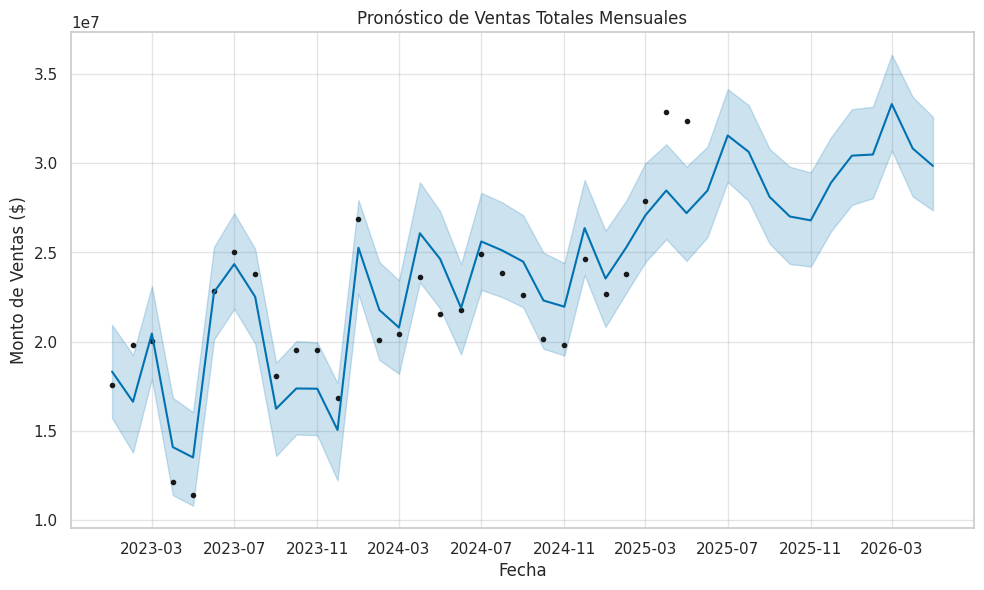

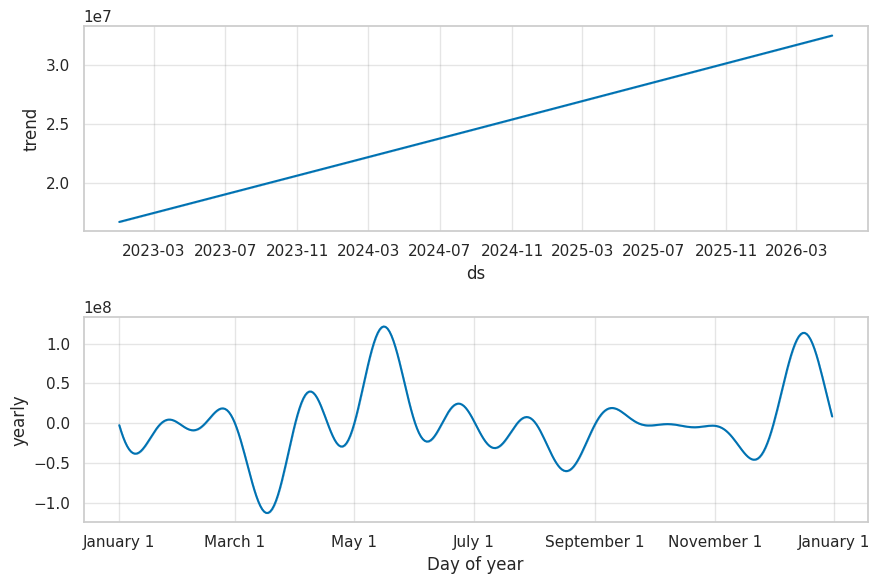


Pronóstico de ventas completado.


In [22]:
# Asegurarse de que las columnas necesarias estén limpias y preparadas (como en el código anterior)
# Se asume que 'data' ya tiene 'Fecha_dt' y 'Monto_Numerico'
# Asegurarse de que las importaciones necesarias (pandas, matplotlib, seaborn) ya se han ejecutado

print("\n--- Pronóstico de Ventas Totales Mensuales con Prophet ---")

# 1. Preparar la Serie Temporal para Pronóstico
# Agrupar por mes y año para obtener las ventas mensuales totales
# Usamos 'Fecha_dt' para el índice temporal
ventas_mensuales = data.set_index('Fecha_dt').resample('MS')['Monto_Numerico'].sum().reset_index()

# Prophet espera las columnas con nombres específicos: 'ds' (fecha) y 'y' (valor)
ventas_prophet = ventas_mensuales.rename(columns={'Fecha_dt': 'ds', 'Monto_Numerico': 'y'})

# Prophet maneja los NaNs en la serie temporal internamente, pero es bueno verificar
print("Serie temporal de ventas mensuales preparada para Prophet:")
display(ventas_prophet.head())
print("\nInformación de la serie temporal:")
ventas_prophet.info()


# 2. Inicializar y Entrenar el Modelo Prophet
from prophet import Prophet

# Crear una instancia del modelo Prophet
# Puedes ajustar parámetros como seasonality_mode, weekly_seasonality, etc. si es necesario
# Por defecto, Prophet detecta estacionalidad diaria, semanal y anual si hay suficientes datos
modelo = Prophet()

# Entrenar el modelo con tus datos históricos de ventas mensuales
print("\nEntrenando el modelo Prophet...")
modelo.fit(ventas_prophet)
print("Modelo Prophet entrenado.")


# 3. Crear el DataFrame para Predicciones Futuras
# Definir cuántos períodos (meses) hacia el futuro quieres pronosticar
periodos_a_pronosticar = 12 # Por ejemplo, pronosticar los próximos 12 meses

# Crear un DataFrame con las fechas futuras para las que queremos predicciones
# frequency='MS' indica frecuencia mensual (Month Start)
futuro = modelo.make_future_dataframe(periods=periodos_a_pronosticar, freq='MS')

print(f"\nDataFrame 'futuro' creado para {periodos_a_pronosticar} meses futuros:")
display(futuro.tail())


# 4. Realizar las Predicciones
# Usar el modelo entrenado para predecir los valores futuros
pronostico = modelo.predict(futuro)

print("\nPredicciones generadas. Columnas principales del pronóstico:")
# Las columnas importantes en el pronóstico son 'ds' (fecha), 'yhat' (predicción),
# 'yhat_lower' (intervalo de confianza inferior), 'yhat_upper' (intervalo de confianza superior)
display(pronostico[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


# 5. Visualizar el Pronóstico
print("\nVisualizando el pronóstico:")

# Prophet tiene funciones de visualización integradas
fig1 = modelo.plot(pronostico)
plt.title('Pronóstico de Ventas Totales Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Monto de Ventas ($)')
plt.show()

# Visualizar los componentes de la estacionalidad y tendencia
fig2 = modelo.plot_components(pronostico)
plt.show()


# 6. (Opcional) Evaluar la Precisión del Modelo
# Si tienes datos más recientes que no usaste para entrenar, puedes evaluarlo
# Para una evaluación más rigurosa, se usaría la validación cruzada de series temporales
# Prophet tiene funciones para esto (cross_validation y performance_metrics)
# Esto va más allá del alcance de un primer pronóstico, pero es el siguiente paso lógico

print("\nPronóstico de ventas completado.")


--- Pronóstico de Ventas Totales Mensuales con Prophet ---
Serie temporal de ventas mensuales preparada para Prophet:


,ds,y
0,2023-01-01,17584958
1,2023-02-01,19807405
2,2023-03-01,20022028
3,2023-04-01,12139152
4,2023-05-01,11426762


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx4i_vivj/rd4votyy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx4i_vivj/dnh0h1jn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6246', 'data', 'file=/tmp/tmpx4i_vivj/rd4votyy.json', 'init=/tmp/tmpx4i_vivj/dnh0h1jn.json', 'output', 'file=/tmp/tmpx4i_vivj/prophet_modelrmbm5ugv/prophet_model-20250621025511.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:55:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Información de la serie temporal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      29 non-null     datetime64[ns]
 1   y       29 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 596.0 bytes

Entrenando el modelo Prophet...


02:55:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Modelo Prophet entrenado.

DataFrame 'futuro' creado para 12 meses futuros:


,ds
36,2026-01-01
37,2026-02-01
38,2026-03-01
39,2026-04-01
40,2026-05-01



Predicciones generadas. Columnas principales del pronóstico:


,ds,yhat,yhat_lower,yhat_upper
36,2026-01-01,3.041893e+07,2.771777e+07,3.314954e+07
37,2026-02-01,3.048158e+07,2.793907e+07,3.333030e+07
38,2026-03-01,3.330837e+07,3.069307e+07,3.587672e+07
39,2026-04-01,3.082168e+07,2.797931e+07,3.346587e+07
40,2026-05-01,2.984216e+07,2.707494e+07,3.253766e+07



Visualizando el pronóstico y guardando gráficos:
Gráfico de pronóstico principal guardado en: /content/pronostico_ventas_prophet.png


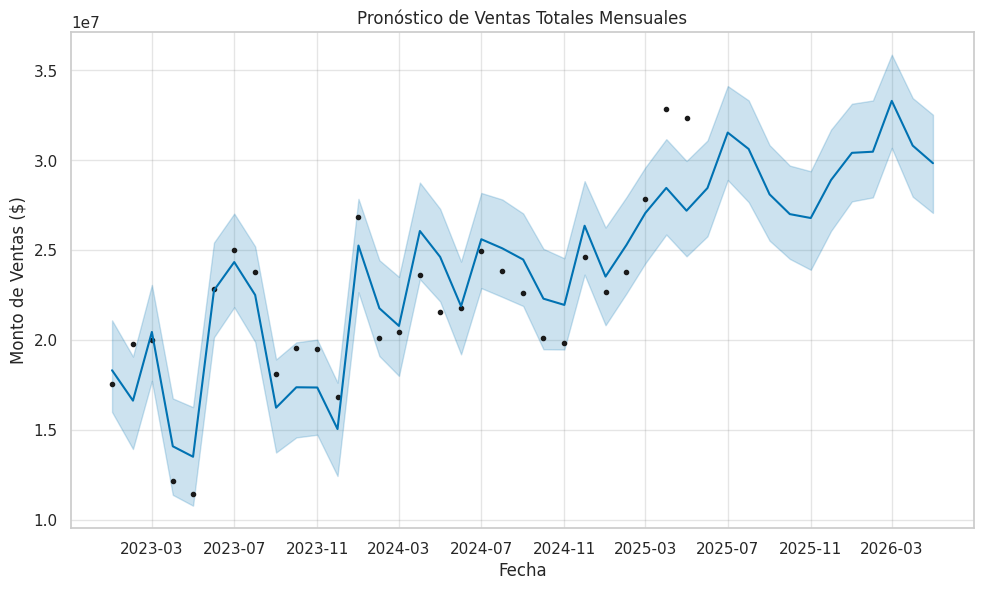

Gráfico de componentes guardado en: /content/pronostico_ventas_prophet_componentes.png


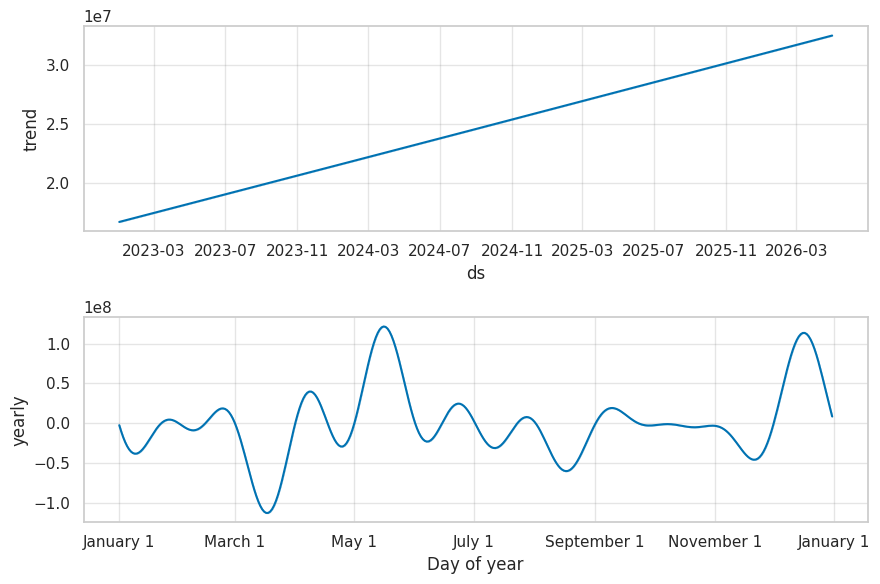


Datos de pronóstico guardados en CSV en: /content/pronostico_ventas_prophet.csv

Pronóstico de ventas y exportación completados.


In [23]:
# Asegurarse de que las columnas necesarias estén limpias y preparadas (como en el código anterior)
# Se asume que 'data' ya tiene 'Fecha_dt' y 'Monto_Numerico'
# Asegurarse de que las importaciones necesarias (pandas, matplotlib, seaborn, prophet) ya se han ejecutado

print("\n--- Pronóstico de Ventas Totales Mensuales con Prophet ---")

# 1. Preparar la Serie Temporal para Pronóstico
# Agrupar por mes y año para obtener las ventas mensuales totales
# Usamos 'Fecha_dt' para el índice temporal
ventas_mensuales = data.set_index('Fecha_dt').resample('MS')['Monto_Numerico'].sum().reset_index()

# Prophet espera las columnas con nombres específicos: 'ds' (fecha) y 'y' (valor)
ventas_prophet = ventas_mensuales.rename(columns={'Fecha_dt': 'ds', 'Monto_Numerico': 'y'})

# Prophet maneja los NaNs en la serie temporal internamente, pero es bueno verificar
print("Serie temporal de ventas mensuales preparada para Prophet:")
display(ventas_prophet.head())
print("\nInformación de la serie temporal:")
ventas_prophet.info()


# 2. Inicializar y Entrenar el Modelo Prophet
from prophet import Prophet

# Crear una instancia del modelo Prophet
# Puedes ajustar parámetros como seasonality_mode, weekly_seasonality, etc. si es necesario
# Por defecto, Prophet detecta estacionalidad diaria, semanal y anual si hay suficientes datos
modelo = Prophet()

# Entrenar el modelo con tus datos históricos de ventas mensuales
print("\nEntrenando el modelo Prophet...")
modelo.fit(ventas_prophet)
print("Modelo Prophet entrenado.")


# 3. Crear el DataFrame para Predicciones Futuras
# Definir cuántos períodos (meses) hacia el futuro quieres pronosticar
periodos_a_pronosticar = 12 # Por ejemplo, pronosticar los próximos 12 meses

# Crear un DataFrame con las fechas futuras para las que queremos predicciones
# frequency='MS' indica frecuencia mensual (Month Start)
futuro = modelo.make_future_dataframe(periods=periodos_a_pronosticar, freq='MS')

print(f"\nDataFrame 'futuro' creado para {periodos_a_pronosticar} meses futuros:")
display(futuro.tail())


# 4. Realizar las Predicciones
# Usar el modelo entrenado para predecir los valores futuros
pronostico = modelo.predict(futuro)

print("\nPredicciones generadas. Columnas principales del pronóstico:")
# Las columnas importantes en el pronóstico son 'ds' (fecha), 'yhat' (predicción),
# 'yhat_lower' (intervalo de confianza inferior), 'yhat_upper' (intervalo de confianza superior)
display(pronostico[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


# 5. Visualizar el Pronóstico y Exportar Gráficos
print("\nVisualizando el pronóstico y guardando gráficos:")

# Gráfico principal del pronóstico
fig1 = modelo.plot(pronostico)
plt.title('Pronóstico de Ventas Totales Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Monto de Ventas ($)')
# Guardar el primer gráfico (fig1)
# Puedes especificar el formato del archivo (png, jpeg, svg, pdf, etc.)
# dpi controla la resolución del gráfico
ruta_guardado_fig1 = '/content/pronostico_ventas_prophet.png'
fig1.savefig(ruta_guardado_fig1, bbox_inches='tight', dpi=300)
print(f"Gráfico de pronóstico principal guardado en: {ruta_guardado_fig1}")
plt.show() # Mostrar el gráfico después de guardarlo (opcional, si quieres verlo en el notebook)


# Gráfico de componentes
fig2 = modelo.plot_components(pronostico)
# Guardar el segundo gráfico (fig2)
ruta_guardado_fig2 = '/content/pronostico_ventas_prophet_componentes.png'
fig2.savefig(ruta_guardado_fig2, bbox_inches='tight', dpi=300)
print(f"Gráfico de componentes guardado en: {ruta_guardado_fig2}")
plt.show() # Mostrar el gráfico después de guardarlo (opcional)


# 6. Exportar los Datos de Predicción
# El DataFrame 'pronostico' contiene todas las predicciones
# Puedes guardarlo en un archivo CSV, Excel, etc.

# Guardar el DataFrame de pronóstico a un archivo CSV
ruta_guardado_csv = '/content/pronostico_ventas_prophet.csv'
# index=False para no guardar el índice del DataFrame como una columna
pronostico.to_csv(ruta_guardado_csv, index=False)
print(f"\nDatos de pronóstico guardados en CSV en: {ruta_guardado_csv}")

# Opcional: Guardar a Excel
# ruta_guardado_excel = '/content/pronostico_ventas_prophet.xlsx'
# pronostico.to_excel(ruta_guardado_excel, index=False)
# print(f"Datos de pronóstico guardados en Excel en: {ruta_guardado_excel}")


# 7. (Opcional) Evaluar la Precisión del Modelo (mencionado antes)
# ... código para evaluación ...

print("\nPronóstico de ventas y exportación completados.")